### MỤC TIÊU
Notebook này thực hiện bước **Khám phá Dữ liệu** với các nhiệm vụ chính:
1.  **Hiểu dữ liệu:** Xem cấu trúc, kiểu dữ liệu và thống kê mô tả.
2.  **Kiểm tra sức khỏe dữ liệu:** Phát hiện giá trị thiếu (Missing), trùng lặp (Duplicate), ngoại lai (Outliers) và tính nhất quán (Consistency).
3.  **Phân tích hành vi:** Trực quan hóa và trả lời các câu hỏi về tỷ lệ rời bỏ, các yếu tố tương quan và hành vi giao dịch.
4.  **Định hướng xử lý:** Đề ra kế hoạch cho bước Tiền xử lý (Preprocessing).

___
## KHAI BÁO THƯ VIỆN VÀ TẢI DỮ LIỆU
___

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join('..')))
# Import lại module để cập nhật hàm mới
import importlib
import src.visualization
importlib.reload(src.visualization)

from src.data_processing import load_raw_data, load_and_process_data, load_data_for_preprocessing
from src.visualization import plot_numerical_analysis, plot_correlation_matrix, analyze_and_plot_categorical, plot_churn_pie_chart, plot_correlation_bar, plot_comparison_histogram, plot_cross_tab, plot_grouped_stats, plot_scatter_risk_zone, plot_churn_by_relationship_depth, run_ttest_transactions

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
data_path = '../data/raw/BankChurners.csv'
header, raw_data = load_raw_data(data_path)

Đang đọc dữ liệu thô từ ../data/raw/BankChurners.csv...


___
## MÔ TẢ DỮ LIỆU
___

In [3]:
if header is not None and raw_data is not None:
    print("=== Thông tin cơ bản về bộ dữ liệu thô ===")

    num_rows = raw_data.shape[0]
    print(f"- Số lượng dòng (Samples): {num_rows}")

    num_cols = len(header)
    print(f"- Số lượng cột (Features): {num_cols}")
    print(f"   (Danh sách cột: {', '.  join(header)})") 

    total_cells = num_rows * num_cols
    print(f"- Tổng kích thước dataset (Số phần tử): {total_cells} ô dữ liệu")
    
    # Tính dung lượng file thực tế
    file_size_mb = os.path.getsize(data_path) / (1024 * 1024)
    print(f"- Dung lượng file trên ổ đĩa: ~{file_size_mb:.2f} MB")
    
else:
    print("Không thể tải dữ liệu. Vui lòng kiểm tra lại đường dẫn file.")

=== Thông tin cơ bản về bộ dữ liệu thô ===
- Số lượng dòng (Samples): 10127
- Số lượng cột (Features): 23
   (Danh sách cột: CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2)
- Tổng kích thước dataset (Số phần tử): 232921 ô dữ liệu
- Dung lượng file trên ổ đĩa: ~1.44 MB


### Data Dictionary

| Tên Cột | Kiểu Dữ Liệu | Ý Nghĩa & Mô Tả |
| :--- | :---: | :--- |
| **CLIENTNUM** | Integer | Mã định danh duy nhất của khách hàng. |
| **Attrition_Flag** | Categorical | Biến mục tiêu (Target). Trạng thái của khách hàng:<br>- `Existing Customer`: Khách hàng đang hoạt động.<br>- `Attrited Customer`: Khách hàng đã rời bỏ. |
| **Customer_Age** | Integer | Tuổi của khách hàng. |
| **Gender** | Categorical | Giới tính của khách hàng (M = Male, F = Female). |
| **Dependent_count** | Integer | Số lượng người phụ thuộc (con cái, người thân...). |
| **Education_Level** | Categorical | Trình độ học vấn (High School, Graduate, Uneducated, College,...). |
| **Marital_Status** | Categorical | Tình trạng hôn nhân (Married, Single, Divorced, Unknown). |
| **Income_Category** | Categorical | Nhóm thu nhập hàng năm. |
| **Card_Category** | Categorical | Loại thẻ tín dụng đang sử dụng (Blue, Silver, Gold, Platinum). |
| **Months_on_book** | Integer | Thời gian khách hàng đã gắn bó với ngân hàng (tính bằng tháng). |
| **Total_Relationship_Count** | Integer | Tổng số lượng sản phẩm/dịch vụ khách hàng đang sử dụng (thẻ, vay, tiết kiệm...). |
| **Months_Inactive_12_mon** | Integer | Số tháng không có hoạt động giao dịch trong 12 tháng qua. |
| **Contacts_Count_12_mon** | Integer | Số lần khách hàng liên hệ với ngân hàng trong 12 tháng qua. |
| **Credit_Limit** | Float | Hạn mức tín dụng tối đa của thẻ. |
| **Total_Revolving_Bal** | Float | Tổng dư nợ xoay vòng (số tiền chưa thanh toán hết và chuyển sang kỳ sau). |
| **Avg_Open_To_Buy** | Float | Hạn mức khả dụng trung bình (Credit Limit - Revolving Balance). |
| **Total_Amt_Chng_Q4_Q1** | Float | Tỷ lệ thay đổi số tiền giao dịch (Quý 4 so với Quý 1). |
| **Total_Trans_Amt** | Float | Tổng số tiền giao dịch trong 12 tháng qua. |
| **Total_Trans_Ct** | Integer | Tổng số lần giao dịch trong 12 tháng qua. |
| **Total_Ct_Chng_Q4_Q1** | Float | Tỷ lệ thay đổi số lần giao dịch (Quý 4 so với Quý 1). |
| **Avg_Utilization_Ratio** | Float | Tỷ lệ sử dụng thẻ trung bình (`Total_Revolving_Bal` / `Credit_Limit`). |
| **Naive_Bayes_...** | N/A | Các cột dư thừa từ bộ dữ liệu gốc (thường chứa kết quả của một mô hình khác), cần loại bỏ trước khi xử lý. |

In [4]:
print("=== KIỂM TRA 5 DÒNG ĐẦU ===")
# In header
print(f"{' | '.join(header[:4])} ...") # Chỉ in 4 cột đầu cho gọn
# In 5 dòng đầu
for i in range(5):
    row = raw_data[i]
    print(f"{row[0]} | {row[1]} | {row[2]} | {row[3]} ...")

=== KIỂM TRA 5 DÒNG ĐẦU ===
CLIENTNUM | Attrition_Flag | Customer_Age | Gender ...
768805383 | "Existing Customer" | 45 | "M" ...
818770008 | "Existing Customer" | 49 | "F" ...
713982108 | "Existing Customer" | 51 | "M" ...
769911858 | "Existing Customer" | 40 | "F" ...
709106358 | "Existing Customer" | 40 | "M" ...


___
### Encoding

* **Lý do:** Máy tính và các thuật toán học máy chỉ có thể tính toán trên các con số, chúng không hiểu được dữ liệu dạng chữ.
* **Mục đích:** Chuyển đổi các biến phân loại (Categorical) sang dạng số (Numerical) để mô hình có thể xử lý được.
___
### Loại bỏ cột `CLIENTNUM`

* **Ý nghĩa:** Đây là mã số định danh duy nhất (ID) của mỗi khách hàng.
* **Lý do loại bỏ:**
    * **Không có giá trị dự báo:** ID là một dãy số ngẫu nhiên, không phản ánh hành vi hay đặc điểm của khách hàng.
    * **Gây nhiễu (Overfitting):** Nếu đưa vào, mô hình có thể bị "học vẹt" (nhớ ID nào sẽ rời bỏ) thay vì học các quy luật chung, dẫn đến dự đoán sai khi gặp khách hàng mới.

___
### Loại bỏ các cột `Naive_Bayes_Classifier_...`
* **Ý nghĩa:** Đây là **kết quả dự đoán** (xác suất) được tạo ra từ một mô hình khác.
* **Lý do loại bỏ:**
    * **Rò rỉ dữ liệu (Data Leakage):** Dùng cột này giống như việc "biết trước đáp án" khi đi thi. Mô hình sẽ đạt điểm cao ảo nhưng không học được gì từ thực tế.
    * **Dữ liệu rác:** Đây không phải là thông tin thực tế của khách hàng mà ngân hàng thu thập được.

-> Tất cả đều được xử lý trong hàm `load_and_process_data`
___

In [5]:
# Load và xử lý dữ liệu (Encoding)
X, y, feature_names = load_and_process_data(data_path)

Đang đọc dữ liệu từ ../data/raw/BankChurners.csv...
-> Load thành công. Shape: (10127, 19)


In [6]:
n_rows, n_cols = X.shape
dataset_size = X.size

print(f"=== THÔNG TIN CƠ BẢN ===")
print(f"- Số dòng (Samples): {n_rows}")

print(f"- Số cột (Features): {n_cols}")
print(f"   (Danh sách cột còn lại: {', '.  join(feature_names)})")

print(f"- Kích thước tổng thể của bộ dữ liệu là: {dataset_size} phần tử")

=== THÔNG TIN CƠ BẢN ===
- Số dòng (Samples): 10127
- Số cột (Features): 19
   (Danh sách cột còn lại: Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio)
- Kích thước tổng thể của bộ dữ liệu là: 192413 phần tử


In [7]:
print(f"=== THỐNG KÊ TÓM TẮT VÀ PHẠM VI DỮ LIỆU ===")

# Định dạng cột: Tên biến | Phạm vi | Trung bình | Trung vị | Độ lệch chuẩn | Số giá trị khác nhau
header_fmt = "{:<25} | {:<15} | {:<10} | {:<10} | {:<10} | {:<10}"
print("-" * 95)
print(header_fmt.format("Feature Name", "Range [Min-Max]", "Mean", "Median", "Std Dev", "Unique Val"))
print("-" * 95)

for i, name in enumerate(feature_names):
    col_data = X[:, i]
    
    # Tính toán các chỉ số thống kê cơ bản 
    v_min = np.min(col_data)
    v_max = np.max(col_data)
    v_mean = np.mean(col_data)
    v_median = np.median(col_data)
    v_std = np.std(col_data)
    
    # Đếm số lượng giá trị duy nhất
    unique_vals = np.unique(col_data)
    n_unique = len(unique_vals)
    
    # Tạo chuỗi hiển thị khoảng giá trị
    range_str = f"[{v_min:.0f} - {v_max:.0f}]"
    
    # In ra dòng dữ liệu
    print(header_fmt.format(
        str(name)[:25], 
        range_str,
        f"{v_mean:.2f}",
        f"{v_median:.2f}",
        f"{v_std:.2f}",
        f"{n_unique}"
    ))

=== THỐNG KÊ TÓM TẮT VÀ PHẠM VI DỮ LIỆU ===
-----------------------------------------------------------------------------------------------
Feature Name              | Range [Min-Max] | Mean       | Median     | Std Dev    | Unique Val
-----------------------------------------------------------------------------------------------
Customer_Age              | [26 - 73]       | 46.33      | 46.00      | 8.02       | 45        
Gender                    | [0 - 1]         | 0.47       | 0.00       | 0.50       | 2         
Dependent_count           | [0 - 5]         | 2.35       | 2.00       | 1.30       | 6         
Education_Level           | [0 - 6]         | 3.10       | 3.00       | 1.83       | 7         
Marital_Status            | [0 - 3]         | 1.46       | 1.00       | 0.74       | 4         
Income_Category           | [0 - 5]         | 2.86       | 3.00       | 1.50       | 6         
Card_Category             | [0 - 3]         | 0.18       | 0.00       | 0.69       | 4      

___
## KIỂM TRA CHẤT LƯỢNG DỮ LIỆU
___

In [8]:
n_missing = np.isnan(X).sum()
print(f"1. Số lượng giá trị thiếu: {n_missing}")

1. Số lượng giá trị thiếu: 0


In [9]:
unique_rows = np.unique(X, axis=0)
n_duplicates = len(X) - len(unique_rows)
print(f"2. Số lượng dòng trùng lặp: {n_duplicates}")

2. Số lượng dòng trùng lặp: 0


In [10]:
print("3. KIỂM TRA TÍNH NHẤT QUÁN CỦA DỮ LIỆU")

# Quy tắc: Credit_Limit = Total_Revolving_Bal + Avg_Open_To_Buy
try:
    idx_limit = np.where(feature_names == 'Credit_Limit')[0][0]
    idx_bal = np.where(feature_names == 'Total_Revolving_Bal')[0][0]
    idx_open = np.where(feature_names == 'Avg_Open_To_Buy')[0][0]
    
    # Tính chênh lệch tuyệt đối
    diff = np.abs(X[:, idx_limit] - (X[:, idx_bal] + X[:, idx_open]))
    n_inconsistent = np.sum(diff > 0.1)
    print(f"- Số dòng sai lệch logic: {n_inconsistent}")
        
except IndexError:
    print("Không đủ cột để kiểm tra.")

3. KIỂM TRA TÍNH NHẤT QUÁN CỦA DỮ LIỆU
- Số dòng sai lệch logic: 0


___
### Đánh giá Chất lượng Dữ liệu

Sau khi kiểm tra toàn diện, ta có các nhận định sau:
1. **Duplicated Rows (Dòng trùng lặp):** 0 dòng

2. **Empty Rows (Dòng rỗng):** 0 dòng

3.  **Tính Nhất quán (Consistency):**
    * Dữ liệu đạt độ tin cậy cao về mặt logic tài chính (phương trình $Limit = Balance + Open\_To\_Buy$).
    * Không có giá trị khuyết (Missing Values) hay dòng trùng lặp (Duplicates).

___
## PHÂN TÍCH DỮ LIỆU SỐ
___

=== PHÂN TÍCH CHI TIẾT BIẾN SỐ ===

ĐẶC TRƯNG: Customer_Age
   - Mean: 46.33 | Median: 46.00 | Std: 8.02
   - Phân phối: Đối xứng (Skew: -0.03)


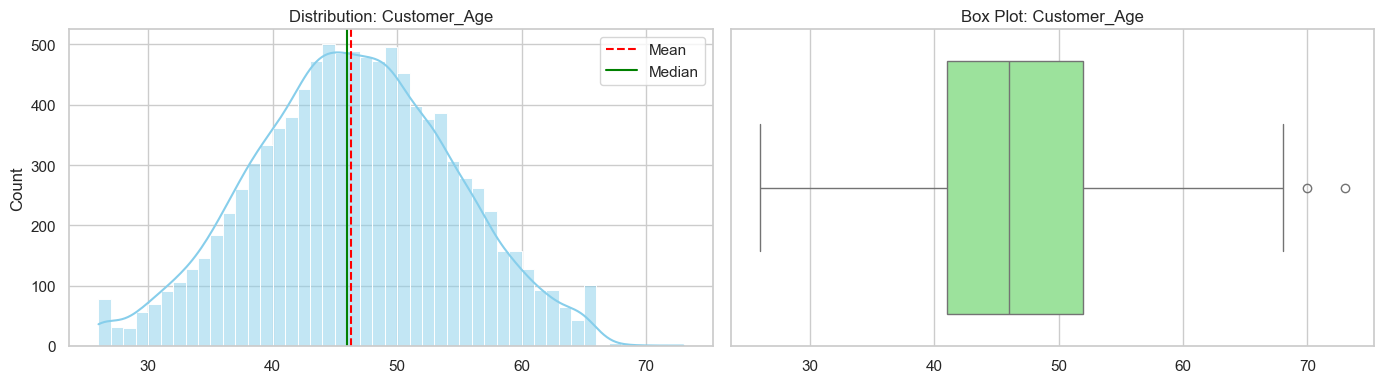

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Dependent_count
   - Mean: 2.35 | Median: 2.00 | Std: 1.30
   - Phân phối: Đối xứng (Skew: -0.02)


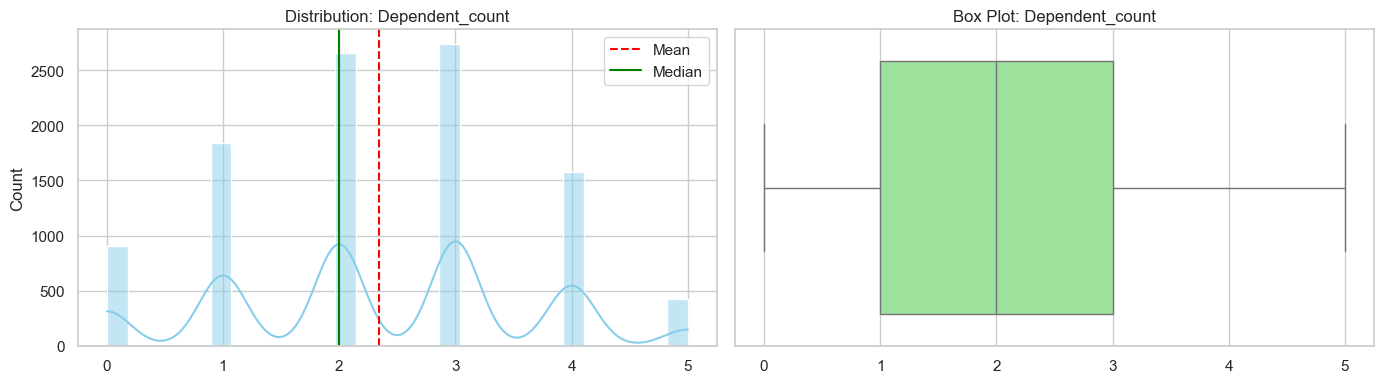

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Months_on_book
   - Mean: 35.93 | Median: 36.00 | Std: 7.99
   - Phân phối: Đối xứng (Skew: -0.11)


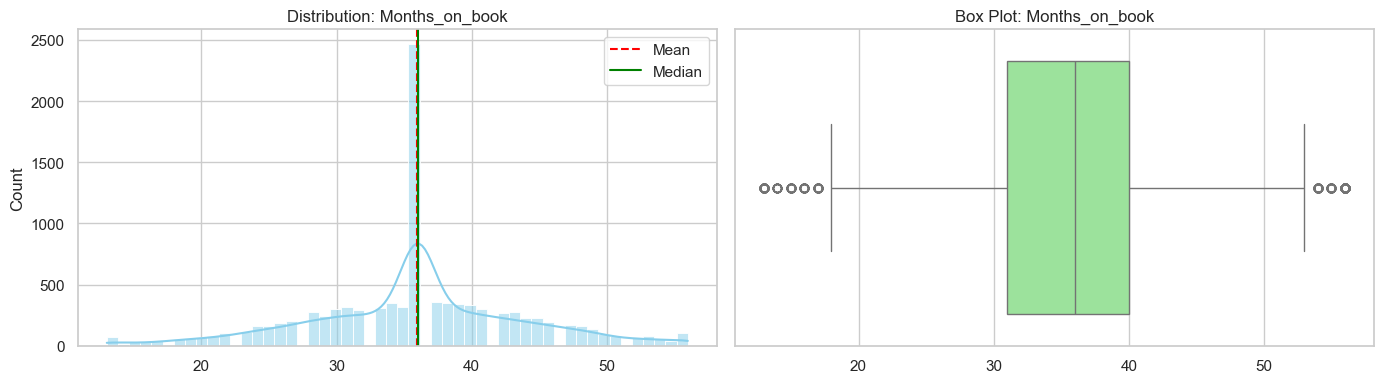

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Total_Relationship_Count
   - Mean: 3.81 | Median: 4.00 | Std: 1.55
   - Phân phối: Đối xứng (Skew: -0.16)


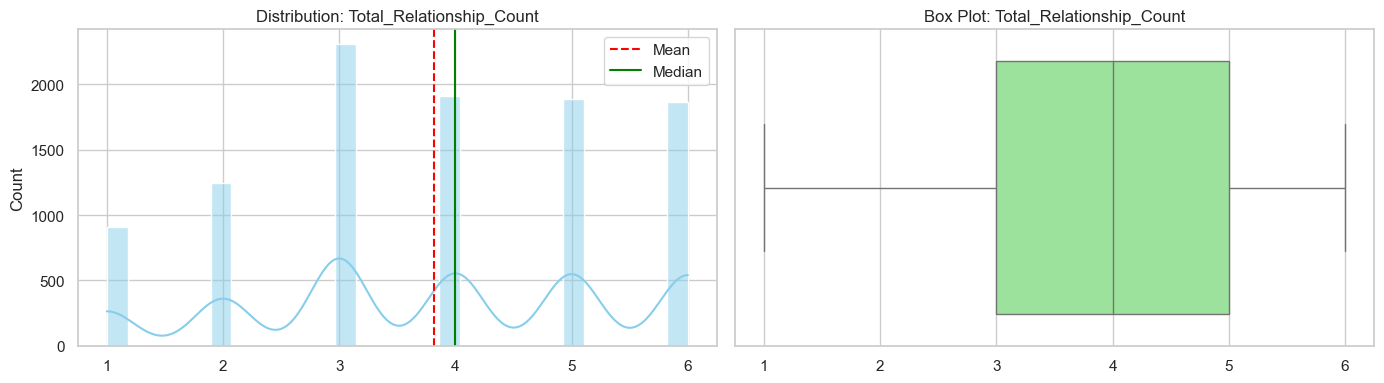

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Months_Inactive_12_mon
   - Mean: 2.34 | Median: 2.00 | Std: 1.01
   - Phân phối: Lệch phải (Skew: 0.63)


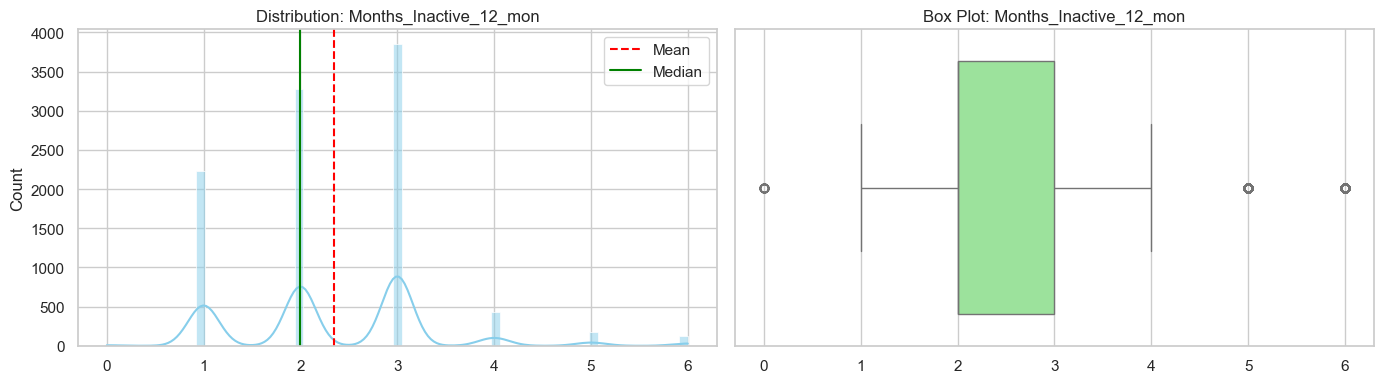

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Contacts_Count_12_mon
   - Mean: 2.46 | Median: 2.00 | Std: 1.11
   - Phân phối: Đối xứng (Skew: 0.01)


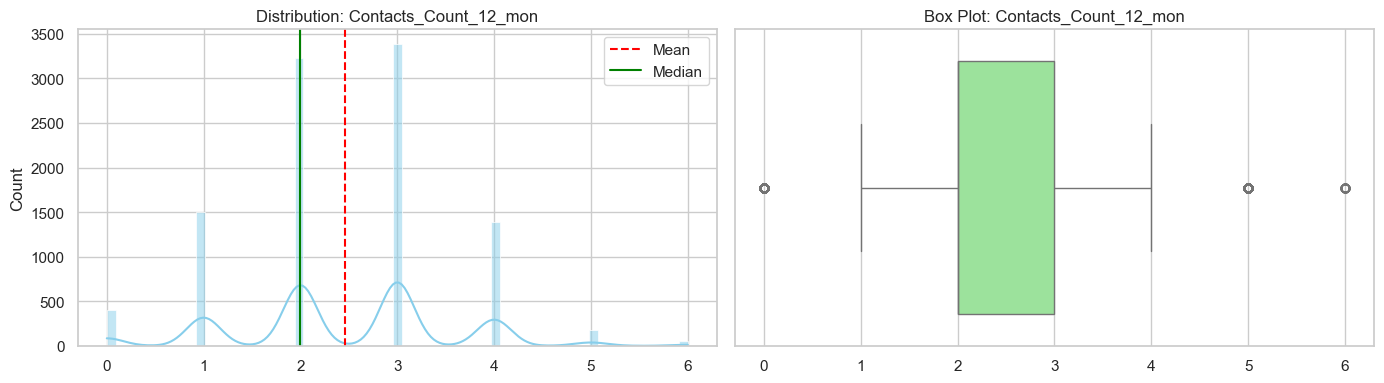

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Credit_Limit
   - Mean: 8631.95 | Median: 4549.00 | Std: 9088.33
   - Phân phối: Lệch phải (Skew: 1.67)


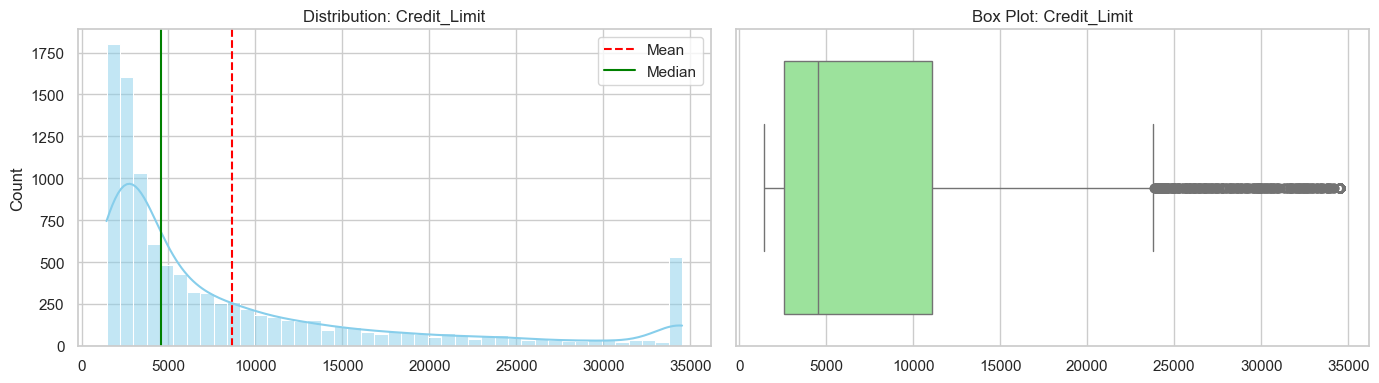

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Total_Revolving_Bal
   - Mean: 1162.81 | Median: 1276.00 | Std: 814.95
   - Phân phối: Đối xứng (Skew: -0.15)


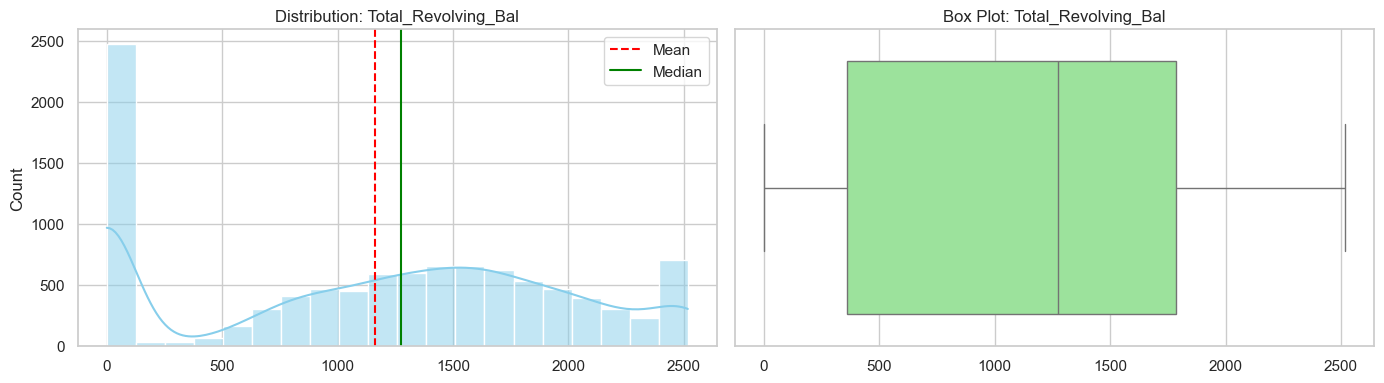

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Avg_Open_To_Buy
   - Mean: 7469.14 | Median: 3474.00 | Std: 9090.24
   - Phân phối: Lệch phải (Skew: 1.66)


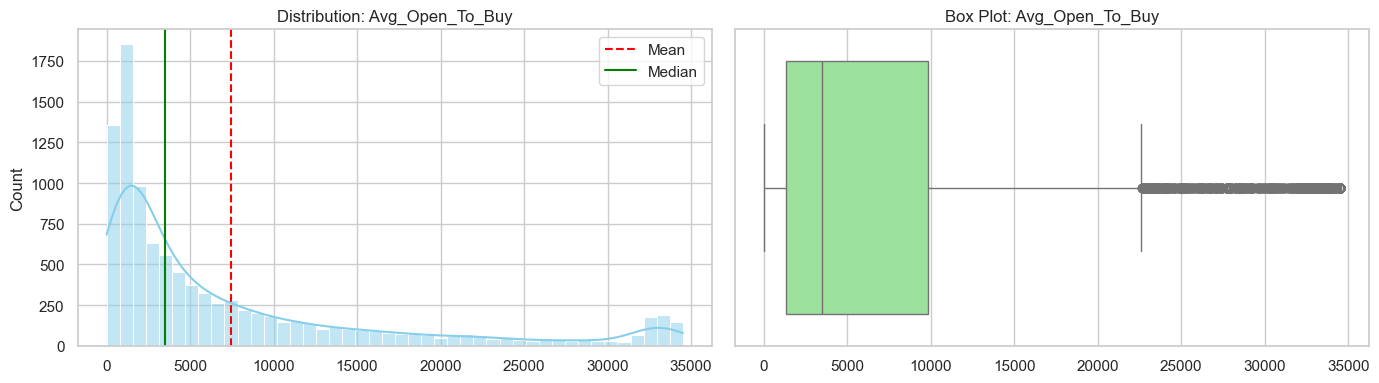

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Total_Amt_Chng_Q4_Q1
   - Mean: 0.76 | Median: 0.74 | Std: 0.22
   - Phân phối: Lệch phải (Skew: 1.73)


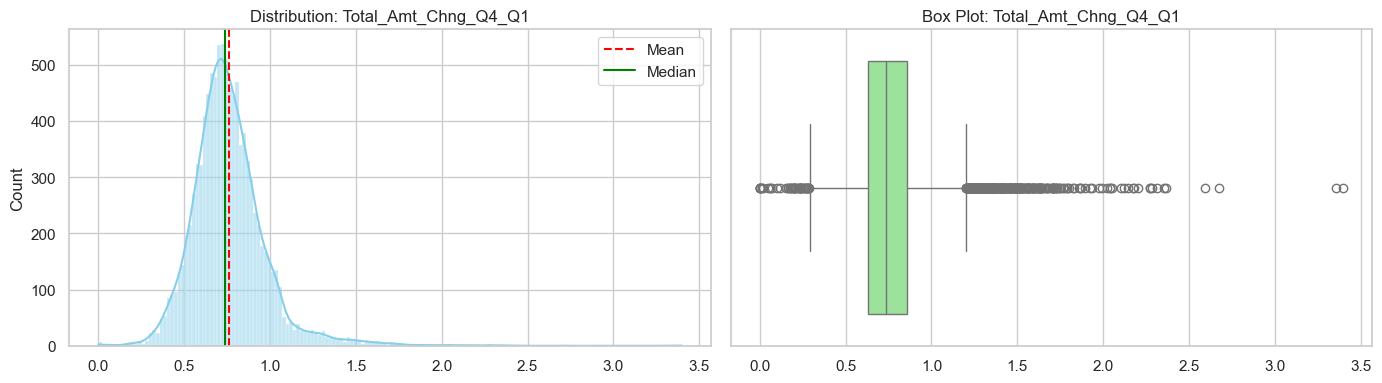

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Total_Trans_Amt
   - Mean: 4404.09 | Median: 3899.00 | Std: 3396.96
   - Phân phối: Lệch phải (Skew: 2.04)


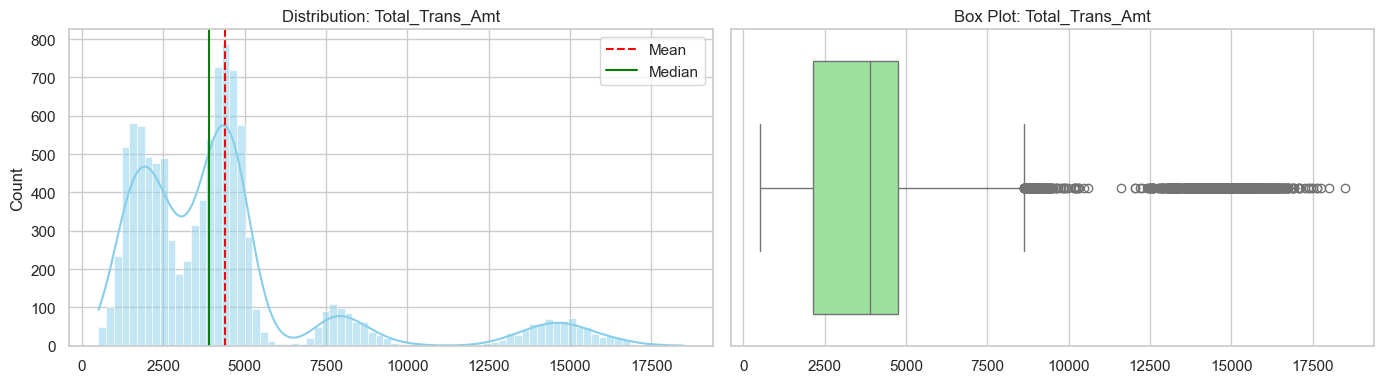

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Total_Trans_Ct
   - Mean: 64.86 | Median: 67.00 | Std: 23.47
   - Phân phối: Đối xứng (Skew: 0.15)


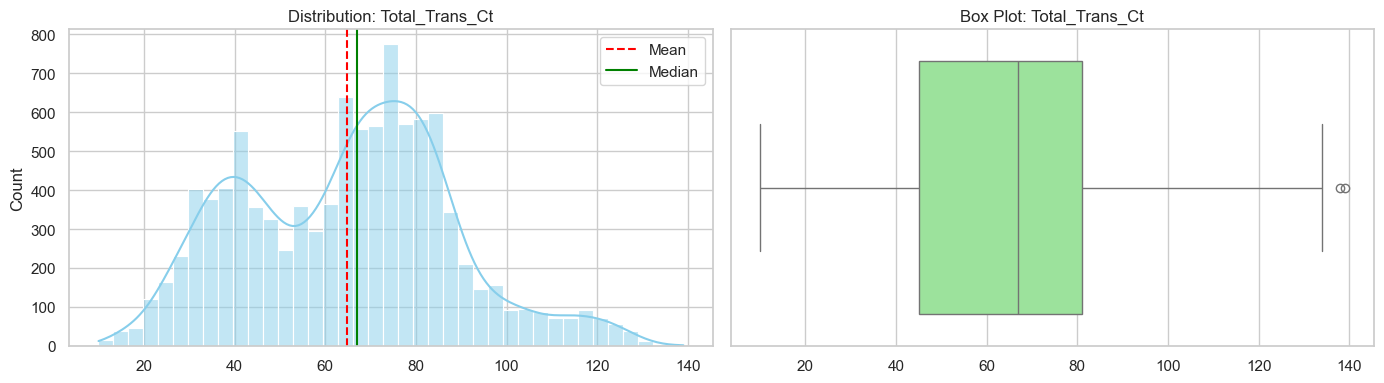

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Total_Ct_Chng_Q4_Q1
   - Mean: 0.71 | Median: 0.70 | Std: 0.24
   - Phân phối: Lệch phải (Skew: 2.06)


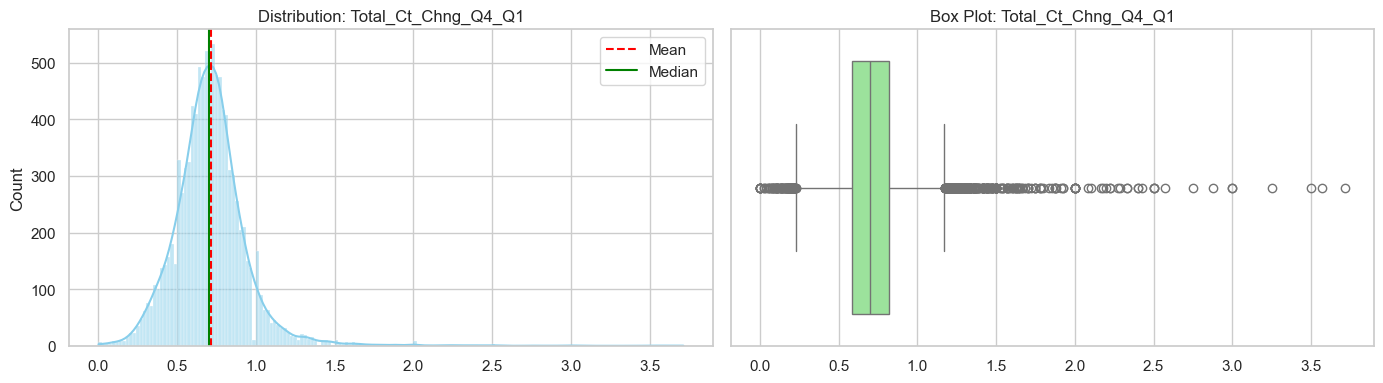

--------------------------------------------------------------------------------

ĐẶC TRƯNG: Avg_Utilization_Ratio
   - Mean: 0.27 | Median: 0.18 | Std: 0.28
   - Phân phối: Lệch phải (Skew: 0.72)


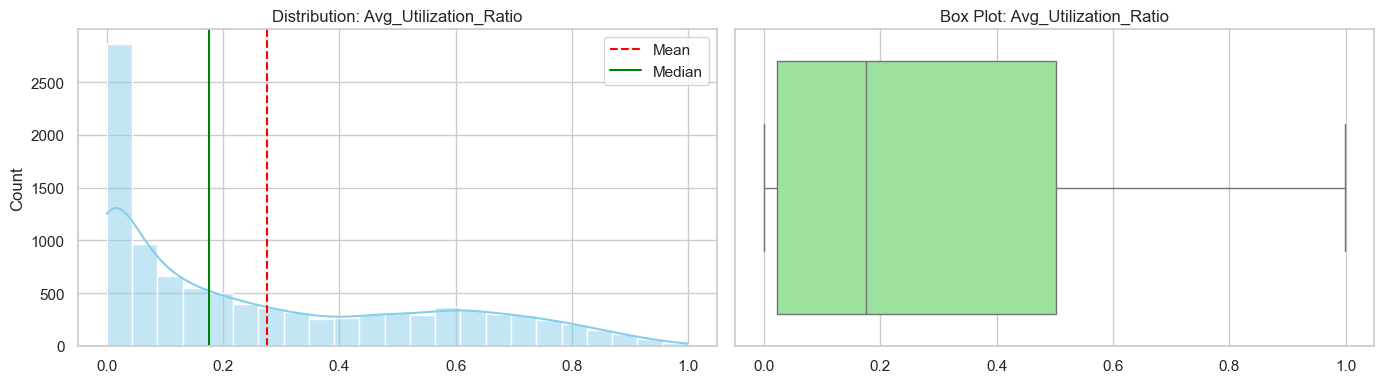

--------------------------------------------------------------------------------


In [11]:
numerical_features = [
    'Customer_Age', 
    'Dependent_count', 
    'Months_on_book', 
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal', 
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt', 
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio'
]

# Gọi hàm vẽ
plot_numerical_analysis(X, feature_names, numerical_features)


___
Sau khi phân tích 14 đặc trưng số (Numerical Features), ta có các nhận định quan trọng sau:

### I. Hình dáng Phân phối (Distribution Shape)

1.  **Phân phối Gần Chuẩn:**
    * **`Customer_Age`**: Tuổi khách hàng phân bố đối xứng quanh mức trung bình (khoảng 46 tuổi), có hình chuông điển hình.
    * **`Months_on_book`**: Thời gian gắn bó tập trung chủ yếu ở mức 36 tháng (trung vị). Dữ liệu này cho thấy phần lớn khách hàng đã có quan hệ lâu dài với ngân hàng (khoảng 3 năm).

2.  **Phân phối Lệch Phải:**
    * Các biến tài chính như **`Credit_Limit`**, **`Avg_Open_To_Buy`**, **`Total_Trans_Amt`** có độ lệch phải rất lớn.
    * **Ý nghĩa:** Phần lớn khách hàng có hạn mức tín dụng và mức chi tiêu thấp đến trung bình. Tuy nhiên, tồn tại một nhóm nhỏ khách hàng "VIP" (Outliers) có hạn mức và chi tiêu cực cao, kéo giá trị trung bình (Mean) lớn hơn hẳn so với trung vị (Median).

3.  **Phân phối Đa Đỉnh:**
    * **`Total_Trans_Ct`** (Tổng số lần giao dịch): Biểu đồ Histogram cho thấy 2-3 đỉnh rõ rệt.
    * **Ý nghĩa:** Gợi ý sự tồn tại của các nhóm hành vi khách hàng khác nhau: nhóm ít giao dịch (có thể là nhóm rủi ro cao), nhóm giao dịch trung bình và nhóm giao dịch rất thường xuyên (khách hàng trung thành).

___
### II. Giá trị Ngoại lai (Outliers)

* **Quan sát:** Biểu đồ Boxplot hiển thị rất nhiều điểm đen (outliers) nằm ngoài vùng "râu" (whiskers) ở các cột: `Credit_Limit`, `Total_Open_To_Buy`, `Total_Trans_Amt`.
* **Đánh giá:** Các giá trị này **KHÔNG PHẢI LÀ LỖI DỮ LIỆU** (Data Error). Chúng phản ánh thực tế thu nhập và chi tiêu của nhóm khách hàng cao cấp.
* **Quyết định:** Không nên xóa bỏ các dòng này vì sẽ làm mất thông tin quan trọng về nhóm khách hàng tiềm năng. Thay vào đó, sẽ xử lý bằng phương pháp **Robust Scaling** hoặc **Log Transformation** ở bước Tiền xử lý.

___
### III. Các Biến Rời rạc (Discrete Variables)

* Các biến đếm như **`Dependent_count`**, **`Total_Relationship_Count`**, **`Months_Inactive_12_mon`**, **`Contacts_Count_12_mon`** có tính chất rời rạc.
* **Lưu ý:** `Contacts_Count` (số lần liên hệ) và `Months_Inactive` (số tháng không hoạt động) là những chỉ báo sớm (early warning signals) quan trọng cho việc dự đoán khách hàng rời bỏ.
___

=== MA TRẬN TƯƠNG QUAN ===


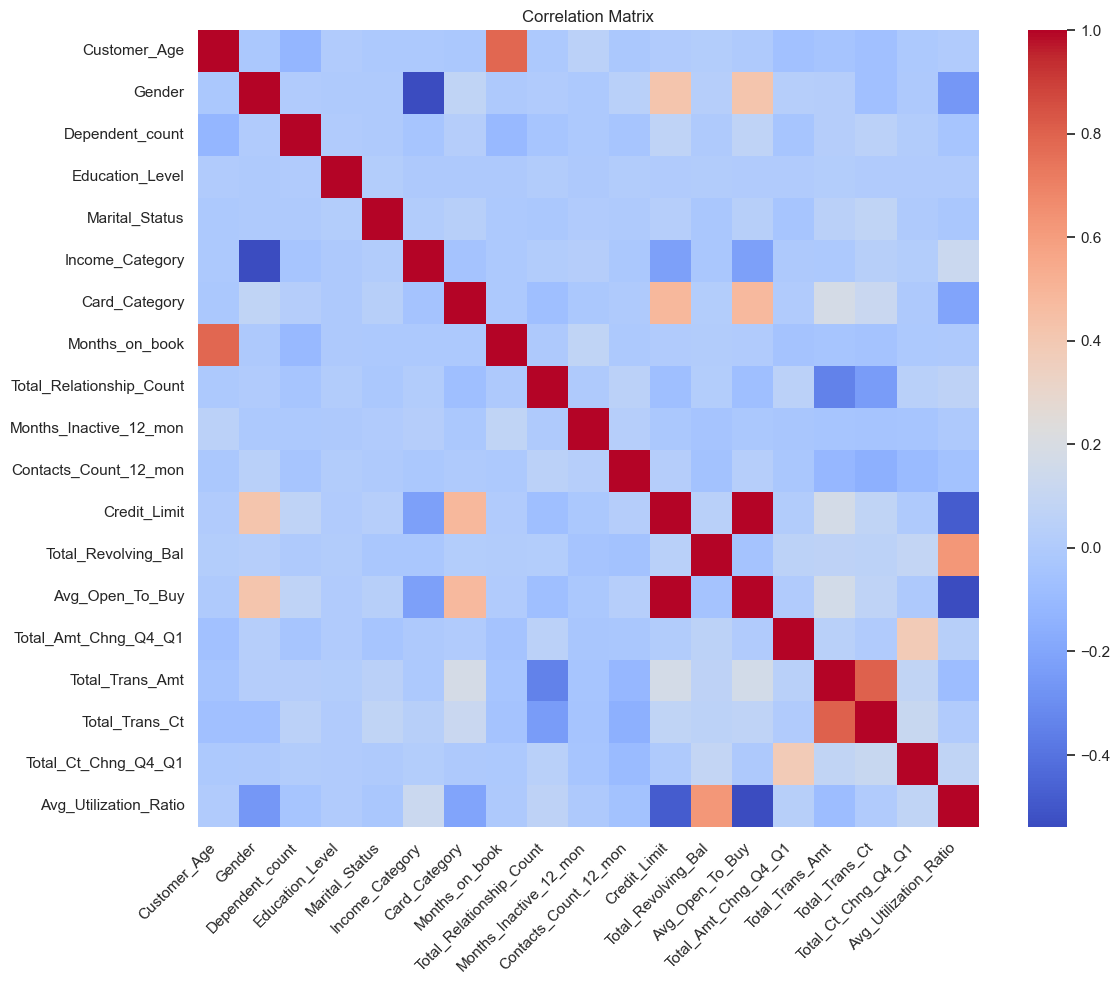

In [12]:
plot_correlation_matrix(X, feature_names)

___
### 1. Các cặp biến có tương quan rất mạnh

##### a. `Credit_Limit` và `Avg_Open_To_Buy`
* **Quan sát:** Hai biến này có hệ số tương quan gần như tuyệt đối (xấp xỉ **1.0**).
* **Giải thích:** Điều này hoàn toàn hợp lý về mặt toán học vì:
  $$\text{Avg\_Open\_To\_Buy} = \text{Credit\_Limit} - \text{Total\_Revolving\_Bal}$$
  (Số dư khả dụng = Hạn mức tín dụng - Dư nợ xoay vòng).
* **Hành động (Action):** Đây là hiện tượng **Đa cộng tuyến**. Chúng ta **bắt buộc phải loại bỏ một trong hai biến** để tránh gây nhiễu cho mô hình (đặc biệt là Logistic Regression).
  * -> **Đề xuất:** Giữ lại `Credit_Limit`, loại bỏ `Avg_Open_To_Buy`.

#### b. `Total_Trans_Amt` và `Total_Trans_Ct`
* **Quan sát:** Tổng số tiền giao dịch và Tổng số lần giao dịch có mối tương quan dương rất mạnh.
* **Giải thích:** Khách hàng sử dụng thẻ càng nhiều lần (tần suất cao) thì tổng số tiền chi tiêu thường cũng sẽ cao theo.
* **Hành động:** Tuy tương quan cao nhưng cả hai đều mang ý nghĩa hành vi quan trọng. Có thể giữ cả hai, hoặc thử nghiệm tạo một biến phái sinh mới ( `Avg_Amt_Per_Trans` = Amount / Count).

___

### 2. Các cặp biến có tương quan khá (Moderate Correlation)

#### a. `Customer_Age` và `Months_on_book`
* **Quan sát:** Tuổi khách hàng và Thời gian quan hệ với ngân hàng (số tháng) có tương quan dương mạnh.
* **Giải thích:** Khách hàng lớn tuổi thường có xu hướng đã mở thẻ và duy trì tài khoản lâu năm hơn so với khách hàng trẻ.
* **Hành động:** Không nhất thiết phải loại bỏ, nhưng cần lưu ý rằng hai biến này cung cấp thông tin khá giống nhau về mặt "thời gian".

#### b. `Total_Revolving_Bal` và `Avg_Utilization_Ratio`
* **Quan sát:** Tổng dư nợ xoay vòng và Tỷ lệ sử dụng thẻ có tương quan dương.
* **Giải thích:** Tỷ lệ sử dụng được tính dựa trên số dư nợ chia cho hạn mức. Do đó, nợ càng nhiều thì tỷ lệ sử dụng càng cao.

___

### 3. Các mối quan hệ với biến mục tiêu

* **Tương quan âm:** `Total_Trans_Ct` và `Total_Trans_Amt` thường có tương quan âm với tỷ lệ rời bỏ (Churn).
  * -> **Ý nghĩa:** Khách hàng giao dịch càng nhiều (số lần và số tiền lớn) thì khả năng rời bỏ càng thấp. Những người ít giao dịch có nguy cơ rời bỏ cao hơn.
* **Tương quan thấp:** Các biến nhân khẩu học như `Customer_Age` hay `Dependent_count` thường có tương quan rất thấp với việc rời bỏ.

___

### 4. Kết luận và Kế hoạch xử lý 

Dựa trên biểu đồ Heatmap, chúng ta cần thực hiện **Feature Selection** (Lựa chọn đặc trưng) để giảm chiều dữ liệu và tăng hiệu quả mô hình:

1.  **Drop (Loại bỏ):** Xóa cột `Avg_Open_To_Buy` vì nó dư thừa  khi đã có `Credit_Limit`.
2.  **Cân nhắc:** Kiểm tra xem việc giữ cả `Customer_Age` và `Months_on_book` có gây ảnh hưởng xấu đến mô hình không (thử nghiệm khi huấn luyện).
3.  **Feature Engineering:** Có thể tạo thêm các biến tỷ lệ từ các cặp biến có tương quan cao để nắm bắt thông tin tốt hơn.
___

In [13]:
print(f"=== PHÂN TÍCH NGOẠI LAI CHI TIẾT ===")
print(f"{'Feature Name':<25} | {'Min':>8} | {'Max':>8} | {'Outliers (IQR)':>14} | {'% Outliers':>10}")
print("-" * 80)

for name in numerical_features:
    if name not in feature_names:
        continue

    # Lấy dữ liệu cột
    col_idx = np.where(feature_names == name)[0][0]
    data = X[:, col_idx]

    # Tính Min/Max
    min_val = np.min(data)
    max_val = np.max(data)

    # Phát hiện Outliers bằng phương pháp IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Đếm số lượng outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(data)) * 100

    print(f"{name:<25} | {min_val:>8.2f} | {max_val:>8.2f} | {n_outliers:>14} | {pct_outliers:>9.2f}%")

print("-" * 80)

=== PHÂN TÍCH NGOẠI LAI CHI TIẾT ===
Feature Name              |      Min |      Max | Outliers (IQR) | % Outliers
--------------------------------------------------------------------------------
Customer_Age              |    26.00 |    73.00 |              2 |      0.02%
Dependent_count           |     0.00 |     5.00 |              0 |      0.00%
Months_on_book            |    13.00 |    56.00 |            386 |      3.81%
Total_Relationship_Count  |     1.00 |     6.00 |              0 |      0.00%
Months_Inactive_12_mon    |     0.00 |     6.00 |            331 |      3.27%
Contacts_Count_12_mon     |     0.00 |     6.00 |            629 |      6.21%
Credit_Limit              |  1438.30 | 34516.00 |            984 |      9.72%
Total_Revolving_Bal       |     0.00 |  2517.00 |              0 |      0.00%
Avg_Open_To_Buy           |     3.00 | 34516.00 |            963 |      9.51%
Total_Amt_Chng_Q4_Q1      |     0.00 |     3.40 |            396 |      3.91%
Total_Trans_Amt         

___
### Đánh giá tính hợp lý của dữ liệu:

* **Hợp lý (Reasonable):**
    * `Customer_Age`: Min 26, Max 73 $\rightarrow$ Phù hợp với độ tuổi lao động và sử dụng thẻ tín dụng.
    * `Months_on_book`: Min 13, Max 56 $\rightarrow$ Hợp lý cho thâm niên khách hàng.
    * `Credit_Limit`: Min 1,438.3, Max 34,516 $\rightarrow$ Phản ánh đúng phân khúc thẻ từ phổ thông đến cao cấp (Platinum).
    * `Total_Trans_Ct`: Min 10, Max 139 $\rightarrow$ Số lần giao dịch trong 1 năm như vậy là thực tế.
    * `Avg_Utilization_Ratio`: Min 0, Max 0.999 $\rightarrow$ Hợp lý (từ không dùng đến dùng gần hết hạn mức).
    * Không phát hiện giá trị âm vô lý (ví dụ: tuổi âm, số tiền âm) trong các cột số liệu này.

**Kết luận:** Các giá trị Min/Max đều nằm trong ngưỡng giải thích được của nghiệp vụ ngân hàng. **Không có dấu hiệu lỗi nhập liệu.**

___
### Phát hiện outliers ở các biến tài chính:

1.  **Các biến có nhiều Outliers:**
    * `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Trans_Amt`: Tỷ lệ ngoại lai cao.
    * **Nguyên nhân:** Do phân phối thu nhập trong xã hội thường bị lệch phải (Right Skewed). Một nhóm nhỏ khách hàng giàu có (VIP) sẽ có hạn mức và chi tiêu vượt trội so với đám đông.

2.  **Là giá trị thật hay lỗi?**
    * **Genuine Extreme Values (Giá trị thật):** Đây là các khách hàng cao cấp, mang lại lợi nhuận lớn hoặc có hành vi chi tiêu đặc biệt.
    * **Quyết định xử lý:**
        * **KHÔNG XÓA:** Việc xóa các dòng này sẽ làm mất thông tin quan trọng về nhóm khách hàng tiềm năng nhất.
        * **Xử lý kỹ thuật:** Sẽ áp dụng **Log Transformation** hoặc **Robust Scaling** ở bước Preprocessing để giảm ảnh hưởng của các giá trị cực đoan này đối với mô hình Logistic Regression.

___
### Đánh giá chất lượng Dữ liệu số

Dựa trên kết quả kiểm tra mã nguồn và thống kê dữ liệu, chúng ta có các kết luận sau về chất lượng bộ dữ liệu:

#### Missing Values (Giá trị thiếu)
* **Tỷ lệ:** **0%**.
* **Nhận xét:** Bộ dữ liệu hoàn toàn sạch, không chứa các giá trị `NaN`, `Null` hoặc ô trống kỹ thuật.

#### Impossible Values (Giá trị phi lý)
* **Kết quả kiểm tra:** Không phát hiện các giá trị phi lý về mặt logic nghiệp vụ.
    * `Customer_Age`: Không có tuổi âm hoặc tuổi 0.
    * `Months_on_book`: Không có giá trị âm.
    * `Credit_Limit`: Tất cả hạn mức đều dương (>0).
    * `Total_Trans_Ct`: Không có số lần giao dịch âm.
* **Kết luận:** Dữ liệu có tính nhất quán cao (Logical Consistency).

#### Placeholder Values (Giá trị giữ chỗ)
* **Phát hiện:** Có sự xuất hiện của giá trị **"Unknown"** đóng vai trò là placeholder trong các biến phân loại:
    * `Education_Level`: Chiếm khoảng **15%**.
    * `Income_Category`: Chiếm khoảng **11%**.
    * `Marital_Status`: Chiếm khoảng **7%**.
* **Ý nghĩa:** Đây là nhóm khách hàng từ chối cung cấp thông tin cá nhân hoặc thông tin chưa được thu thập.
* **Quyết định xử lý:** **Giữ nguyên (Keep)**. Coi "Unknown" là một nhãn (category) hợp lệ thay vì xử lý như dữ liệu thiếu, vì hành vi "không tiết lộ thông tin" cũng có thể mang ý nghĩa dự báo rủi ro riêng biệt.

THỐNG KÊ: SO SÁNH CHỈ SỐ GIỮA NGƯỜI RỜI BỎ (ATTRITED) VÀ HIỆN TẠI (EXISTING)

=== THỐNG KÊ NHÓM: Customer_Age theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 46.66      | 47.00      | 7.66       | 26.00      | 68.00     
"Existing Customer"       | 46.26      | 46.00      | 8.08       | 26.00      | 73.00     


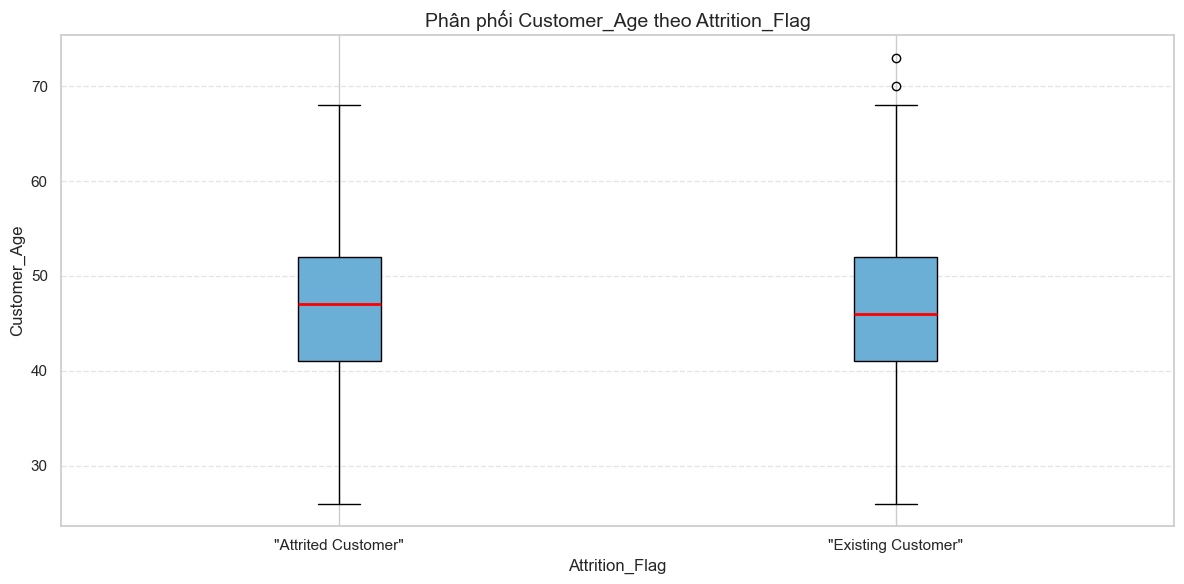


=== THỐNG KÊ NHÓM: Dependent_count theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 2.40       | 2.00       | 1.27       | 0.00       | 5.00      
"Existing Customer"       | 2.34       | 2.00       | 1.30       | 0.00       | 5.00      


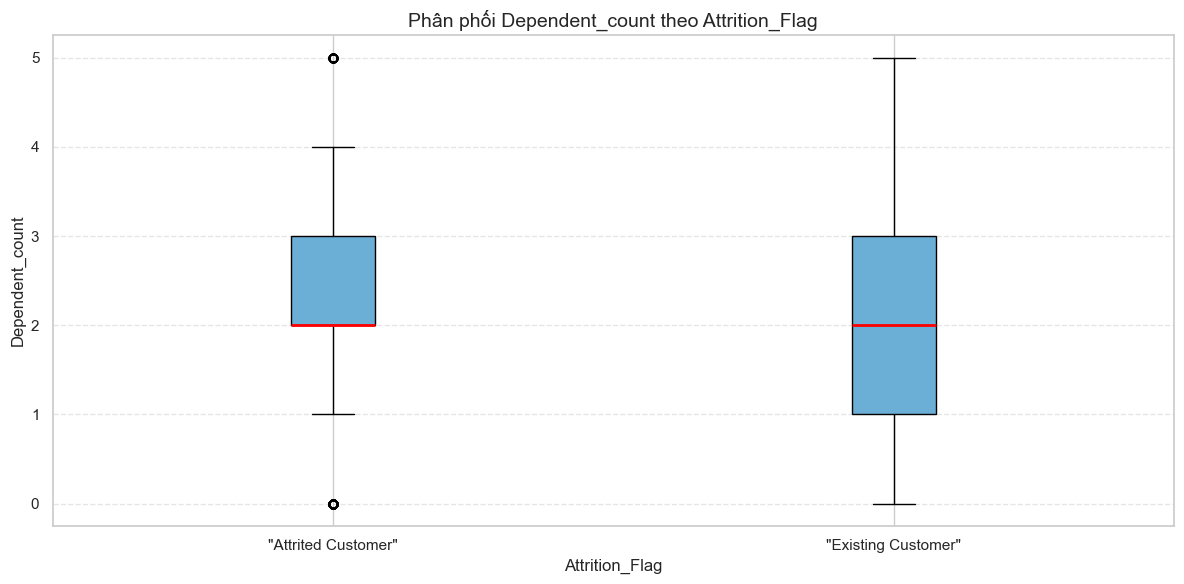


=== THỐNG KÊ NHÓM: Months_on_book theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 36.18      | 36.00      | 7.79       | 13.00      | 56.00     
"Existing Customer"       | 35.88      | 36.00      | 8.02       | 13.00      | 56.00     


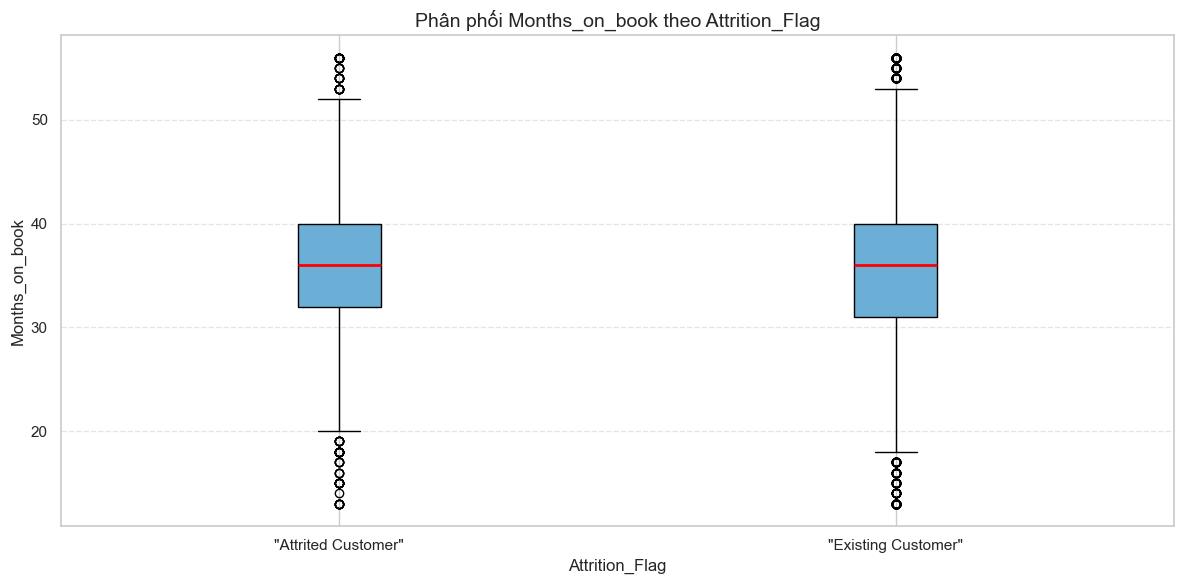


=== THỐNG KÊ NHÓM: Total_Relationship_Count theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 3.28       | 3.00       | 1.58       | 1.00       | 6.00      
"Existing Customer"       | 3.91       | 4.00       | 1.53       | 1.00       | 6.00      


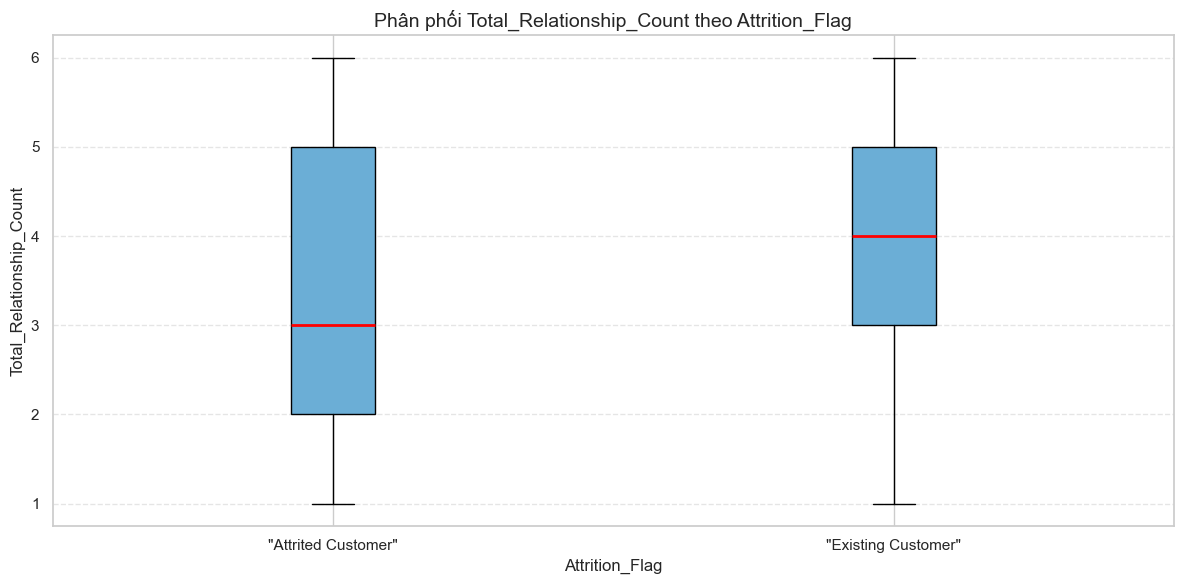


=== THỐNG KÊ NHÓM: Months_Inactive_12_mon theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 2.69       | 3.00       | 0.90       | 0.00       | 6.00      
"Existing Customer"       | 2.27       | 2.00       | 1.02       | 0.00       | 6.00      


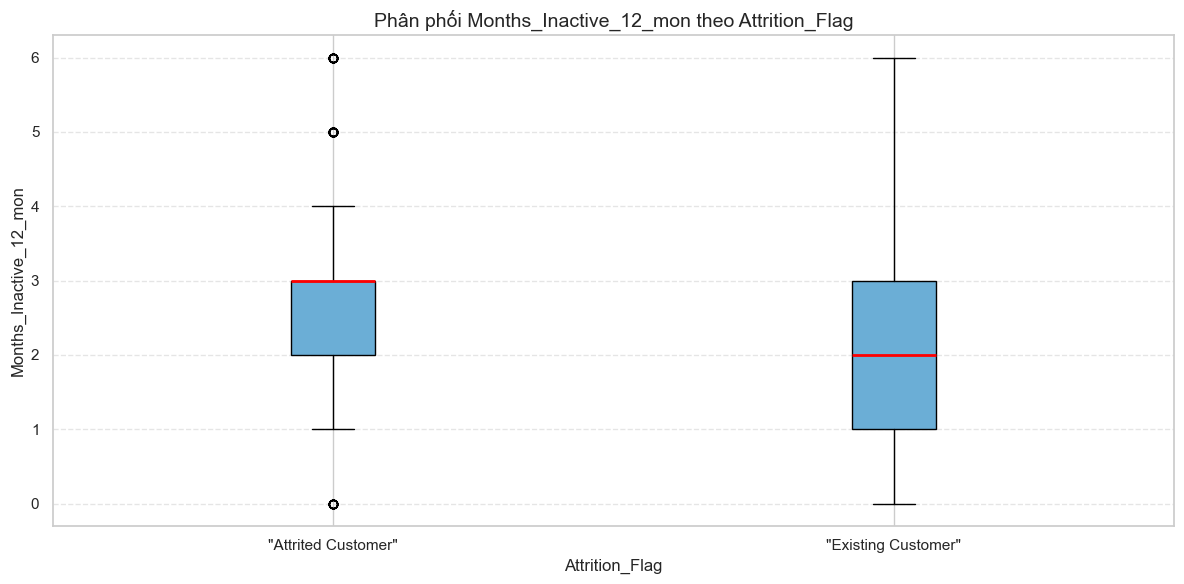


=== THỐNG KÊ NHÓM: Contacts_Count_12_mon theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 2.97       | 3.00       | 1.09       | 0.00       | 6.00      
"Existing Customer"       | 2.36       | 2.00       | 1.08       | 0.00       | 5.00      


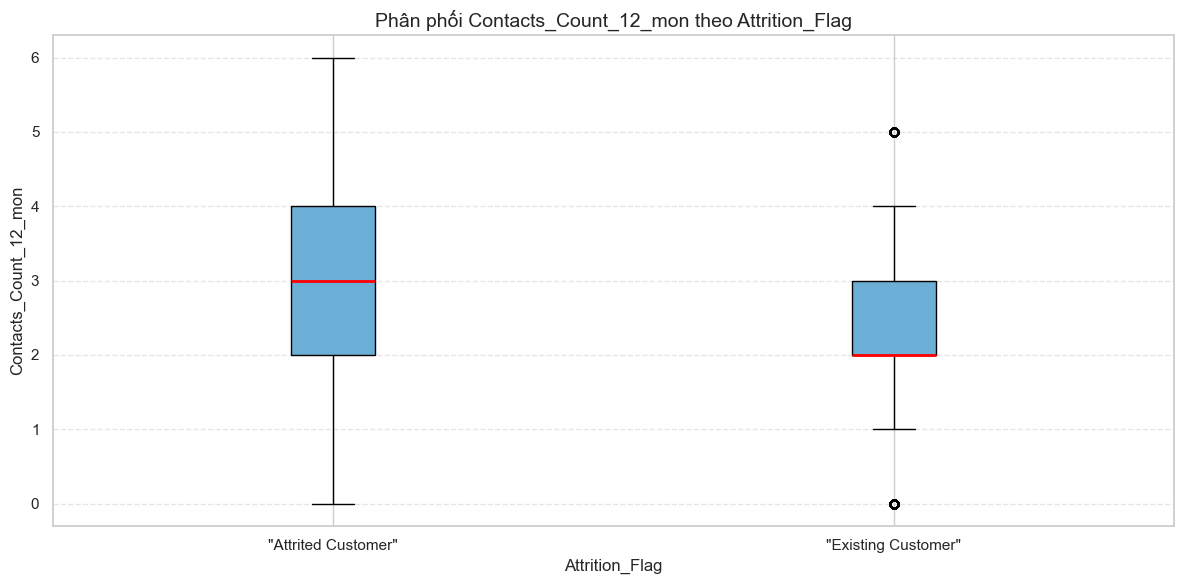


=== THỐNG KÊ NHÓM: Credit_Limit theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 8136.04    | 4178.00    | 9092.54    | 1438.30    | 34516.00  
"Existing Customer"       | 8726.88    | 4643.50    | 9084.44    | 1438.30    | 34516.00  


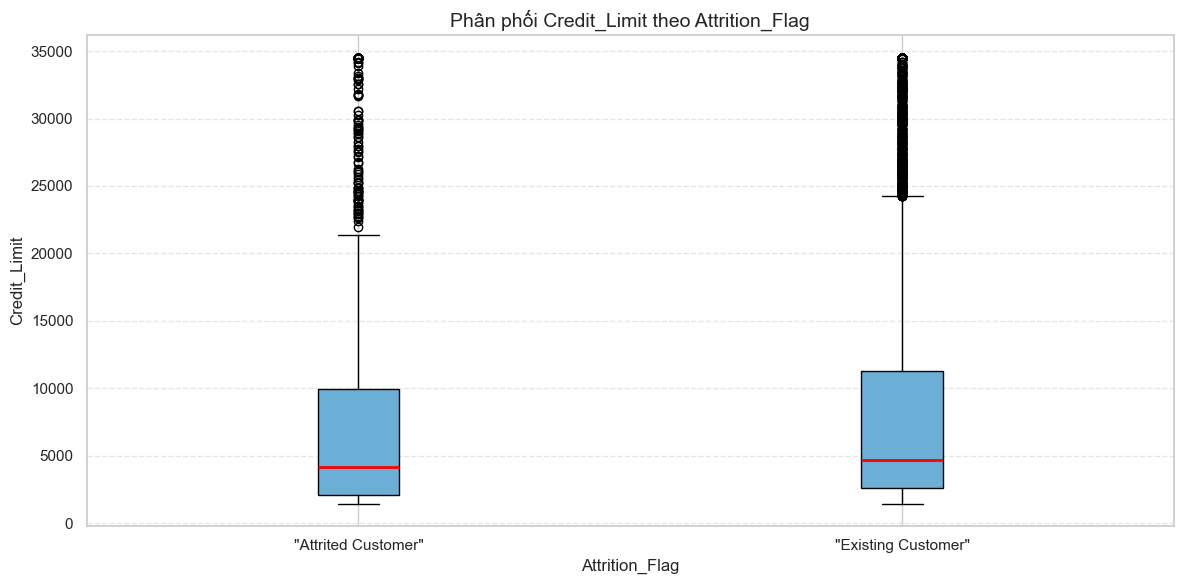


=== THỐNG KÊ NHÓM: Total_Revolving_Bal theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 672.82     | 0.00       | 921.10     | 0.00       | 2517.00   
"Existing Customer"       | 1256.60    | 1364.00    | 757.70     | 0.00       | 2517.00   


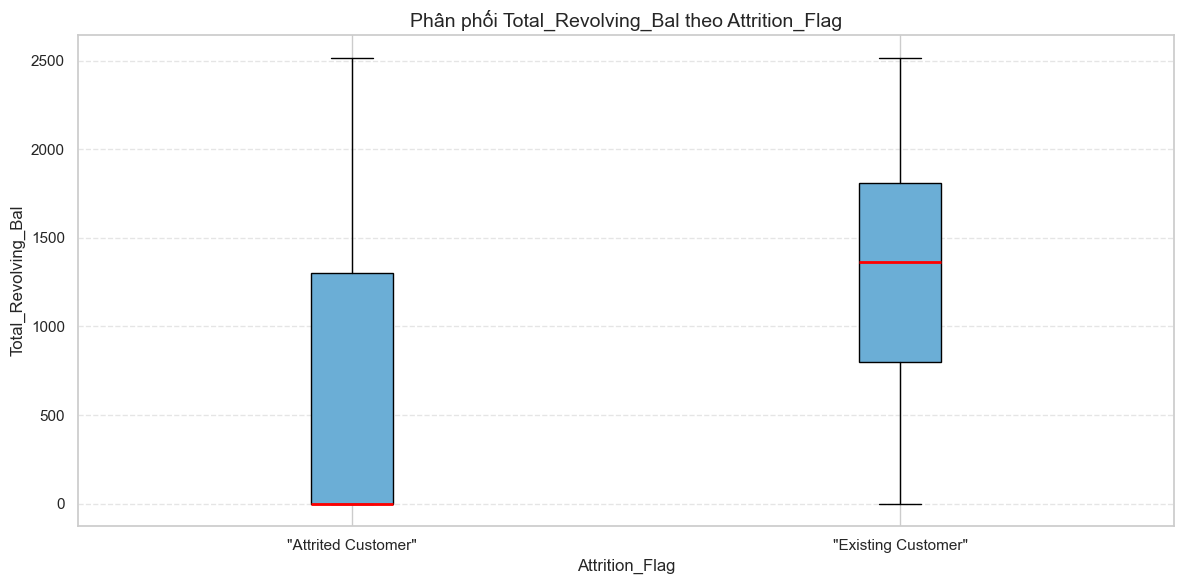


=== THỐNG KÊ NHÓM: Avg_Open_To_Buy theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 7463.22    | 3488.00    | 9106.41    | 3.00       | 34516.00  
"Existing Customer"       | 7470.27    | 3469.50    | 9087.14    | 15.00      | 34516.00  


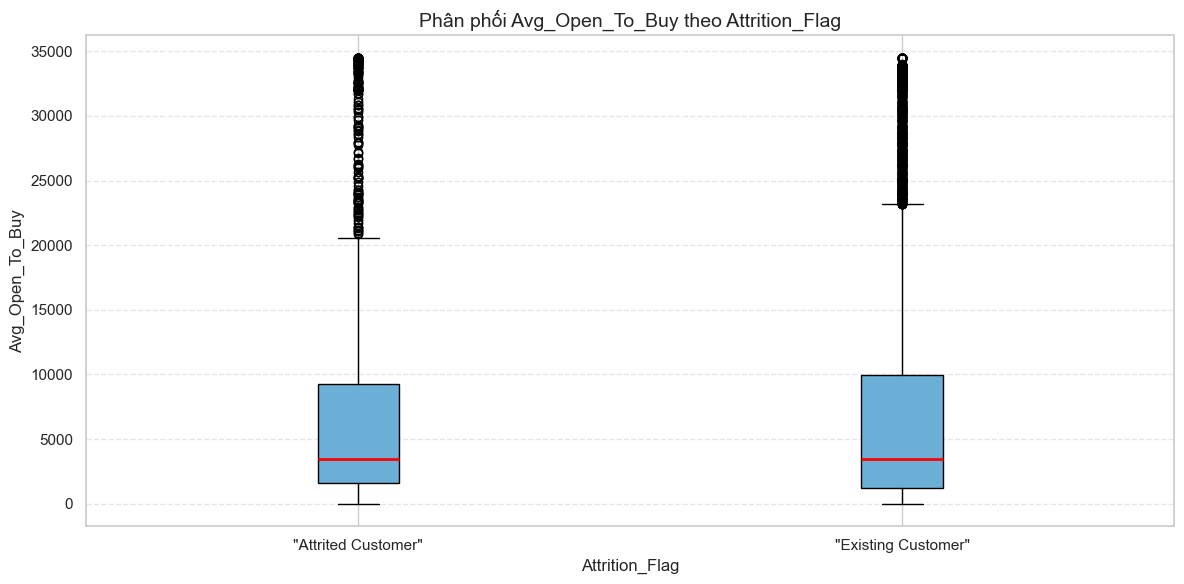


=== THỐNG KÊ NHÓM: Total_Amt_Chng_Q4_Q1 theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 0.69       | 0.70       | 0.21       | 0.00       | 1.49      
"Existing Customer"       | 0.77       | 0.74       | 0.22       | 0.26       | 3.40      


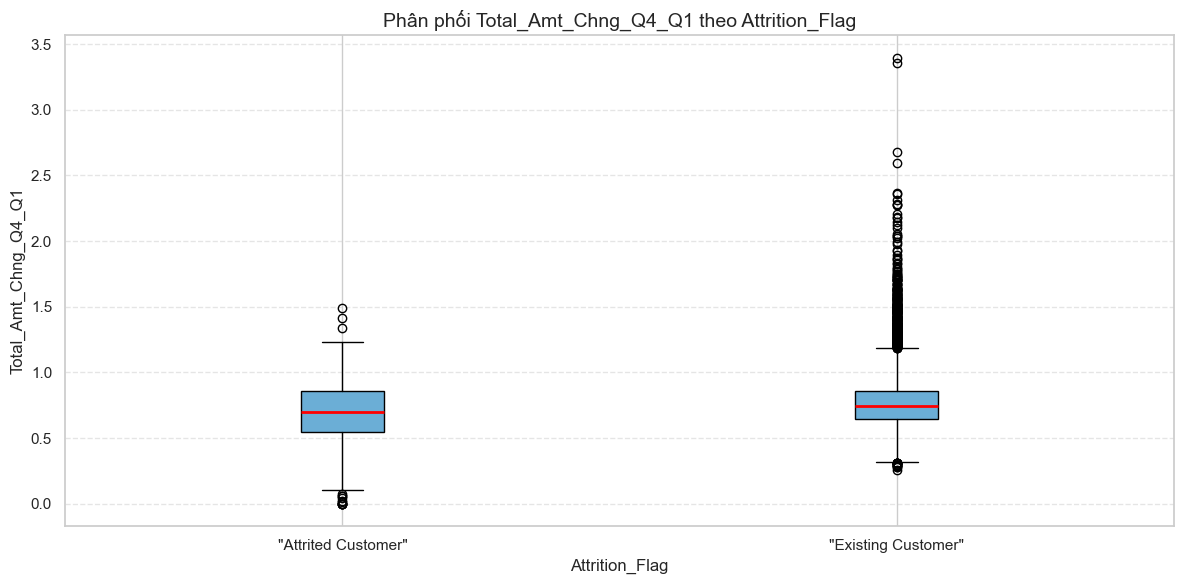


=== THỐNG KÊ NHÓM: Total_Trans_Amt theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 3095.03    | 2329.00    | 2307.52    | 510.00     | 10583.00  
"Existing Customer"       | 4654.66    | 4100.00    | 3512.57    | 816.00     | 18484.00  


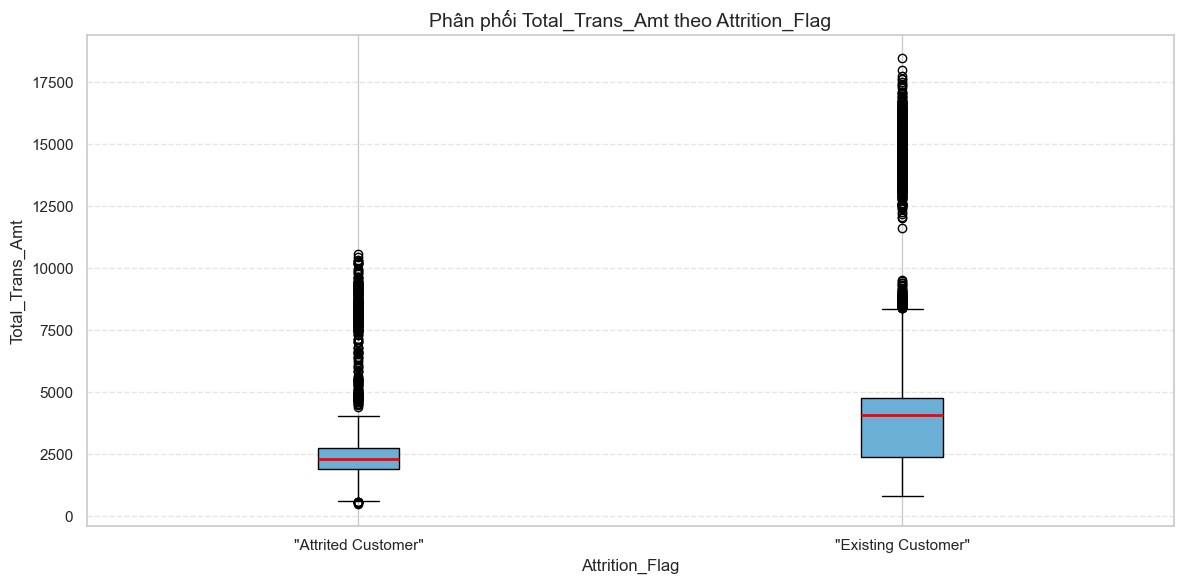


=== THỐNG KÊ NHÓM: Total_Trans_Ct theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 44.93      | 43.00      | 14.56      | 10.00      | 94.00     
"Existing Customer"       | 68.67      | 71.00      | 22.92      | 11.00      | 139.00    


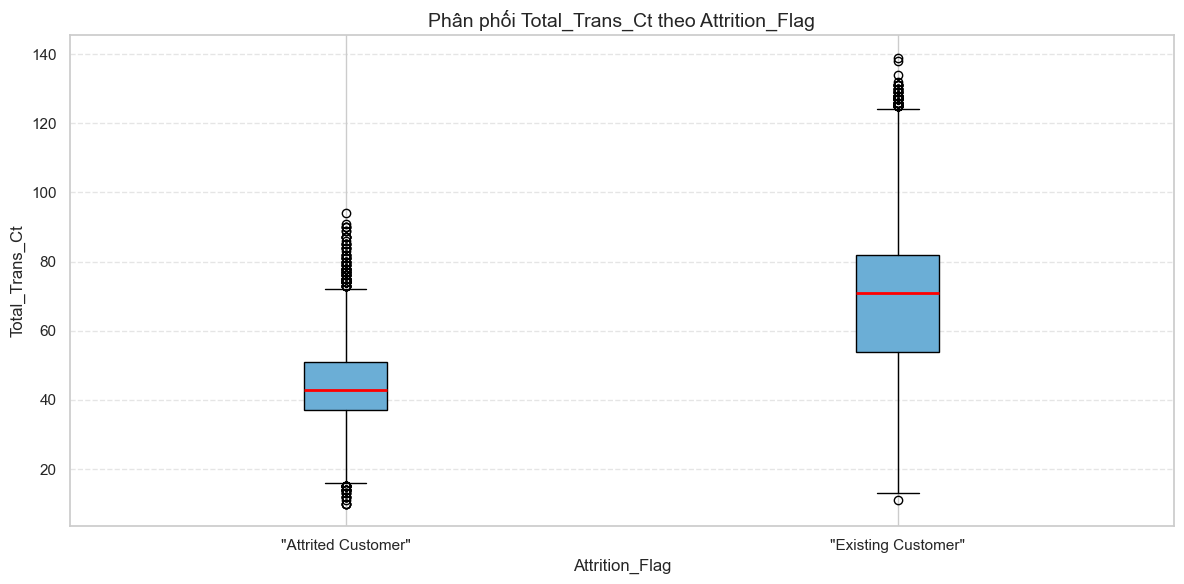


=== THỐNG KÊ NHÓM: Total_Ct_Chng_Q4_Q1 theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 0.55       | 0.53       | 0.23       | 0.00       | 2.50      
"Existing Customer"       | 0.74       | 0.72       | 0.23       | 0.03       | 3.71      


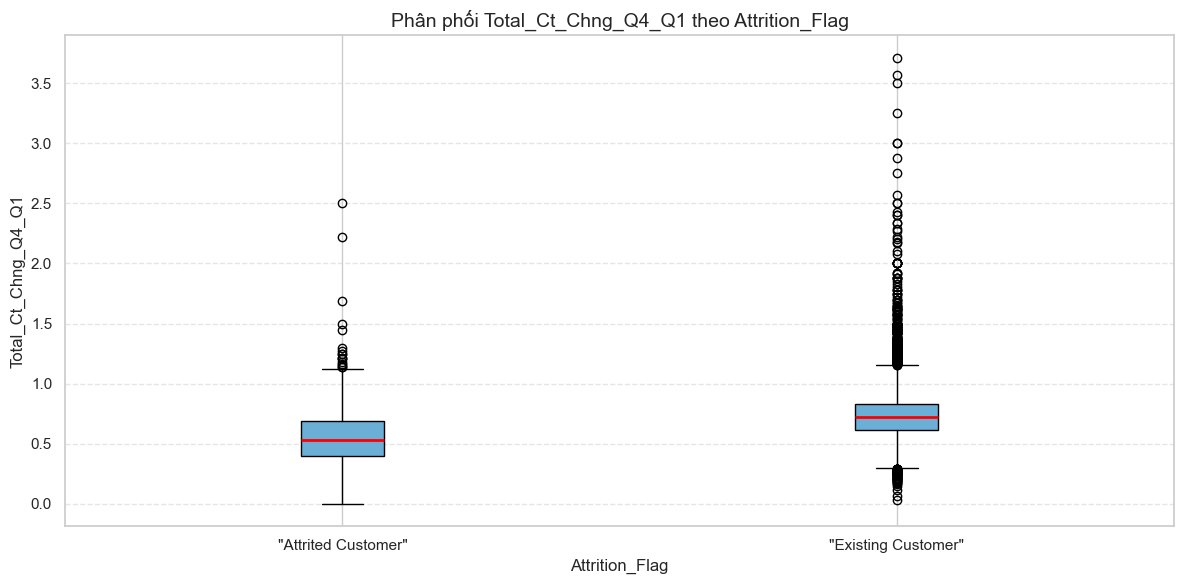


=== THỐNG KÊ NHÓM: Avg_Utilization_Ratio theo Attrition_Flag ===
Nhóm (Category)           | Mean       | Median     | Std        | Min        | Max       
------------------------------------------------------------------------------------------
"Attrited Customer"       | 0.16       | 0.00       | 0.26       | 0.00       | 1.00      
"Existing Customer"       | 0.30       | 0.21       | 0.27       | 0.00       | 0.99      


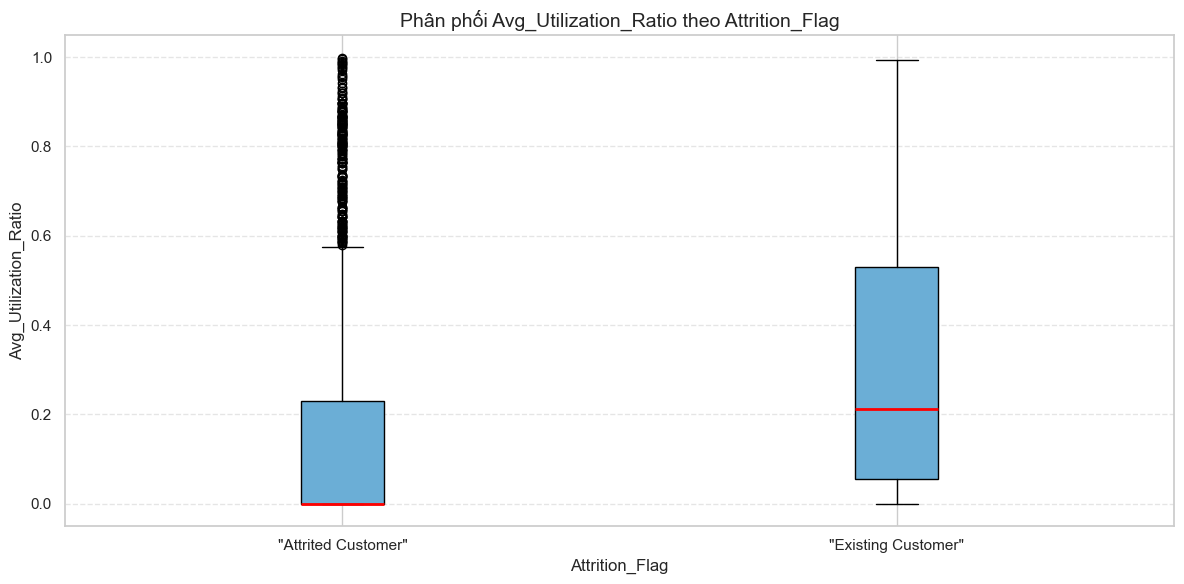

In [14]:
print("THỐNG KÊ: SO SÁNH CHỈ SỐ GIỮA NGƯỜI RỜI BỎ (ATTRITED) VÀ HIỆN TẠI (EXISTING)")
print("=" * 100)

for num_col in numerical_features:
    plot_grouped_stats(raw_data, header, num_col, 'Attrition_Flag')

___
### Kiểm định giả thuyết thống kê

Dựa trên quan sát biểu đồ Boxplot ở trên, ta thấy có sự chênh lệch về số lượng giao dịch giữa hai nhóm khách hàng. Để khẳng định sự khác biệt này có ý nghĩa thống kê hay không (chứ không chỉ là ngẫu nhiên), chúng ta thực hiện kiểm định **Two-sample T-test**.

**Câu hỏi nghiên cứu:**
> Có sự khác biệt thực sự về **Tổng số lượng giao dịch (Total_Trans_Ct)** giữa nhóm khách hàng Rời bỏ (Attrited) và nhóm Hiện tại (Existing) hay không?

**Thiết lập giả thuyết:**
Gọi $\mu_{Attrited}$ và $\mu_{Existing}$ lần lượt là trung bình số lượng giao dịch của nhóm Rời bỏ và nhóm Hiện tại.
* **Giả thuyết không ($H_0$):** Không có sự khác biệt về trung bình số giao dịch giữa hai nhóm.
    $$H_0: \mu_{Attrited} = \mu_{Existing}$$
* **Giả thuyết đối ($H_1$):** Có sự khác biệt đáng kể về trung bình số giao dịch.
    $$H_1: \mu_{Attrited} \neq \mu_{Existing}$$

**Phương pháp:**
Sử dụng công thức T-test tính toán thủ công bằng **NumPy** (không dùng thư viện `scipy` để tuân thủ yêu cầu đề bài):
$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}}$$

In [15]:
run_ttest_transactions(X, y, feature_names)


KIỂM ĐỊNH GIẢ THUYẾT: Total_Trans_Ct
Câu hỏi: Số lượng giao dịch trung bình của nhóm Rời bỏ có khác nhóm Hiện tại không?
 - H0: Mean_Churn == Mean_Existing
 - H1: Mean_Churn != Mean_Existing

THỐNG KÊ MÔ TẢ:
 - Nhóm Existing (n=8500): Mean = 68.67, Var = 525.28
 - Nhóm Churn    (n=1627): Mean = 44.93, Var = 212.24

KẾT QUẢ KIỂM ĐỊNH:
 - T-statistic tính toán: 54.1419
 - Ngưỡng (Critical Value): 1.96 (mức tin cậy 95%)

KẾT LUẬN:
 => |T-stat| > 1.96: BÁC BỎ H0.
 => Có sự khác biệt CÓ Ý NGHĨA THỐNG KÊ về số lượng giao dịch.
------------------------------------------------------------


Dựa trên biểu đồ so sánh giữa nhóm **Rời bỏ (Attrited)** và nhóm **Hiện tại (Existing)**, ta rút ra các "Key Insights" quan trọng:

#### Sự khác biệt về Hành vi Giao dịch
Đây là yếu tố phân loại mạnh nhất:
* **Số lần giao dịch (`Total_Trans_Ct`):** Nhóm Rời bỏ có số lần giao dịch thấp hơn hẳn (trung bình khoảng 40-50 lần), trong khi nhóm Hiện tại thường trên 60 lần.
* **Tổng tiền giao dịch (`Total_Trans_Amt`):** Tương tự, nhóm Rời bỏ chi tiêu ít hơn đáng kể.
* **Kết luận:** Sự sụt giảm trong tần suất sử dụng thẻ là dấu hiệu cảnh báo sớm (Early Warning Signal) rõ rệt nhất.

#### Sự khác biệt về Dư nợ và Liên hệ
* **Dư nợ xoay vòng (`Total_Revolving_Bal`):** Khách hàng rời bỏ thường có dư nợ rất thấp hoặc bằng 0. Họ có xu hướng thanh toán hết nợ trước khi đóng thẻ.
* **Số lần liên hệ (`Contacts_Count_12_mon`):** Nhóm Rời bỏ có tần suất liên hệ với ngân hàng cao hơn (có thể là khiếu nại hoặc hỏi thủ tục hủy dịch vụ).

#### Chân dung khách hàng rời bỏ
> **Khách hàng có nguy cơ rời bỏ cao là người:**
> 1.  Ít sử dụng thẻ (Giao dịch ít, số tiền nhỏ).
> 2.  Không duy trì nợ (Revolving Balance thấp).
> 3.  Thường xuyên liên hệ với ngân hàng (Complaint/Support).
> 4.  Có thời gian "ngủ đông" (Inactive months) kéo dài.

___
## PHÂN TÍCH DỮ LIỆU PHÂN LOẠI
___

=== PHÂN TÍCH CHI TIẾT BIẾN PHÂN LOẠI ===

CỘT: Attrition_Flag
1. Số lượng giá trị (Unique): 2
2. Top giá trị phổ biến:
   - "Existing Customer": 8500 (83.93%)
   - "Attrited Customer": 1627 (16.07%)
3. Đánh giá: Mất cân bằng (Imbalanced)


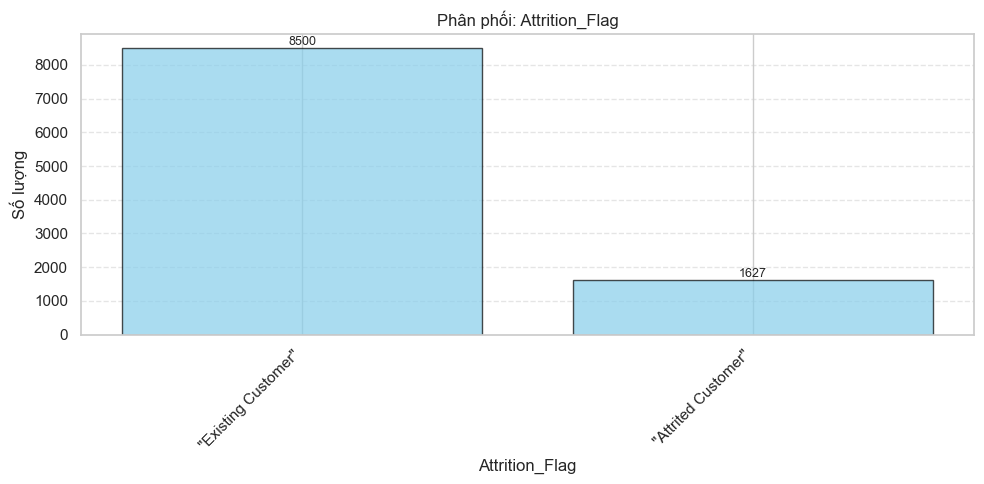


CỘT: Gender
1. Số lượng giá trị (Unique): 2
2. Top giá trị phổ biến:
   - "F": 5358 (52.91%)
   - "M": 4769 (47.09%)
3. Đánh giá: Tương đối cân bằng


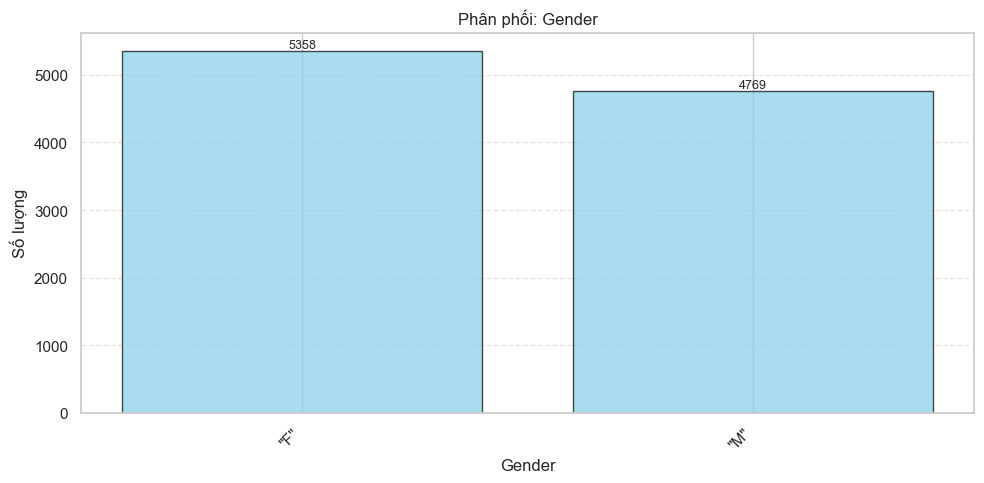


CỘT: Education_Level
1. Số lượng giá trị (Unique): 7
2. Top giá trị phổ biến:
   - "Graduate": 3128 (30.89%)
   - "High School": 2013 (19.88%)
   - "Unknown": 1519 (15.00%)
   - "Uneducated": 1487 (14.68%)
   - "College": 1013 (10.00%)
3. Đánh giá: Tương đối cân bằng


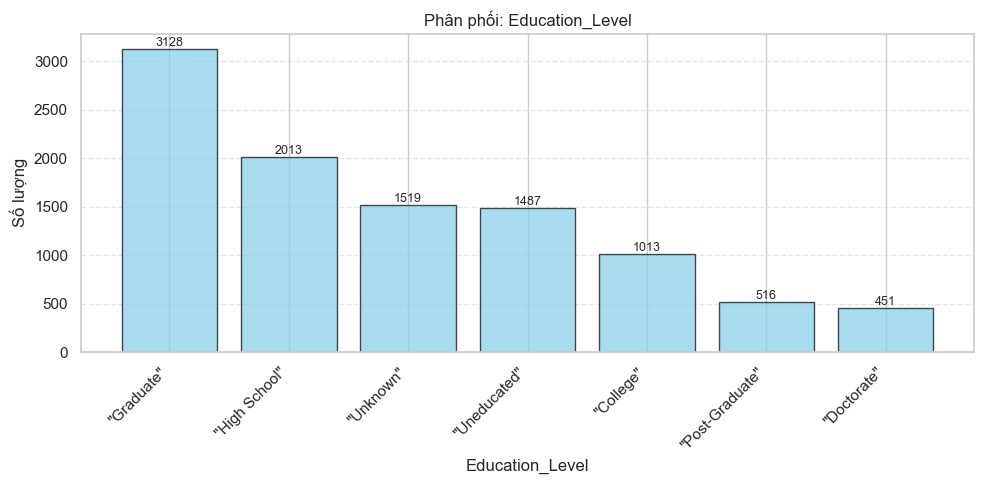


CỘT: Marital_Status
1. Số lượng giá trị (Unique): 4
2. Top giá trị phổ biến:
   - "Married": 4687 (46.28%)
   - "Single": 3943 (38.94%)
   - "Unknown": 749 (7.40%)
   - "Divorced": 748 (7.39%)
3. Đánh giá: Tương đối cân bằng


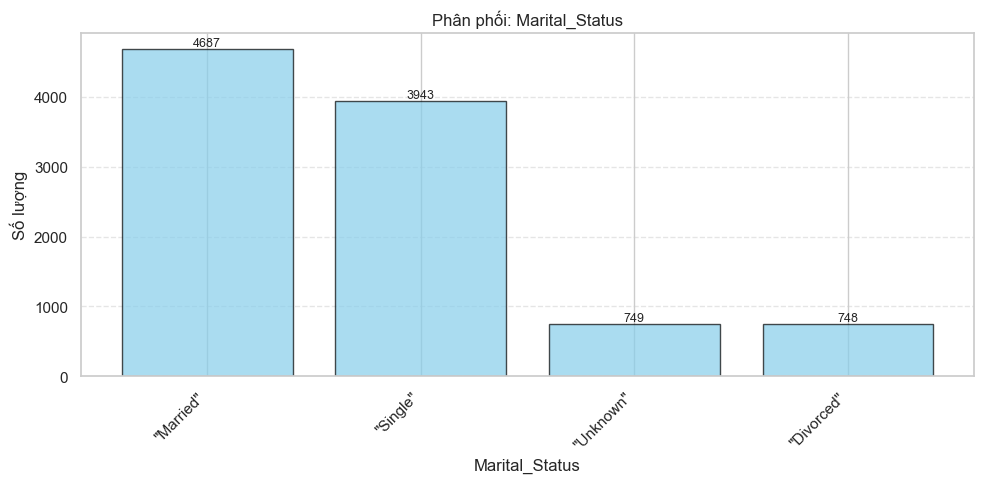


CỘT: Income_Category
1. Số lượng giá trị (Unique): 6
2. Top giá trị phổ biến:
   - "Less than $40K": 3561 (35.16%)
   - "$40K - $60K": 1790 (17.68%)
   - "$80K - $120K": 1535 (15.16%)
   - "$60K - $80K": 1402 (13.84%)
   - "Unknown": 1112 (10.98%)
3. Đánh giá: Tương đối cân bằng


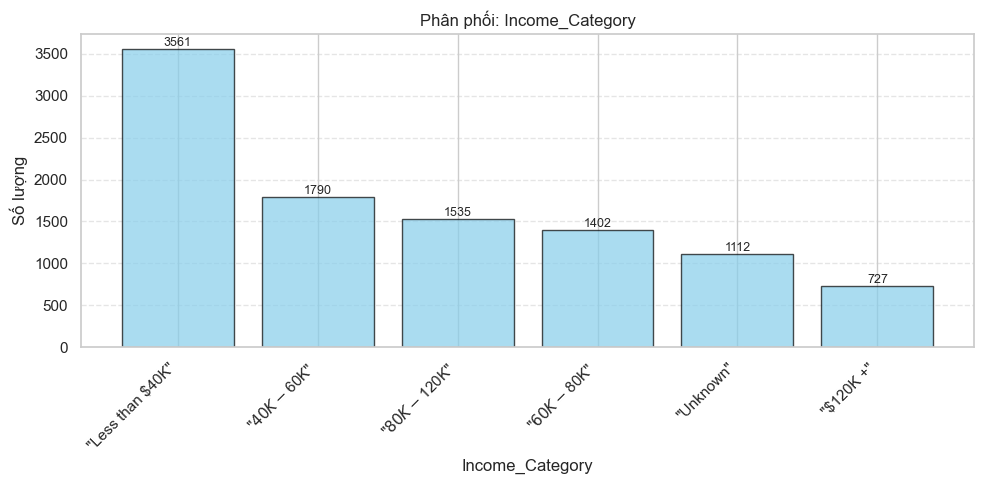


CỘT: Card_Category
1. Số lượng giá trị (Unique): 4
2. Top giá trị phổ biến:
   - "Blue": 9436 (93.18%)
   - "Silver": 555 (5.48%)
   - "Gold": 116 (1.15%)
   - "Platinum": 20 (0.20%)
3. Đánh giá: Mất cân bằng (Imbalanced)


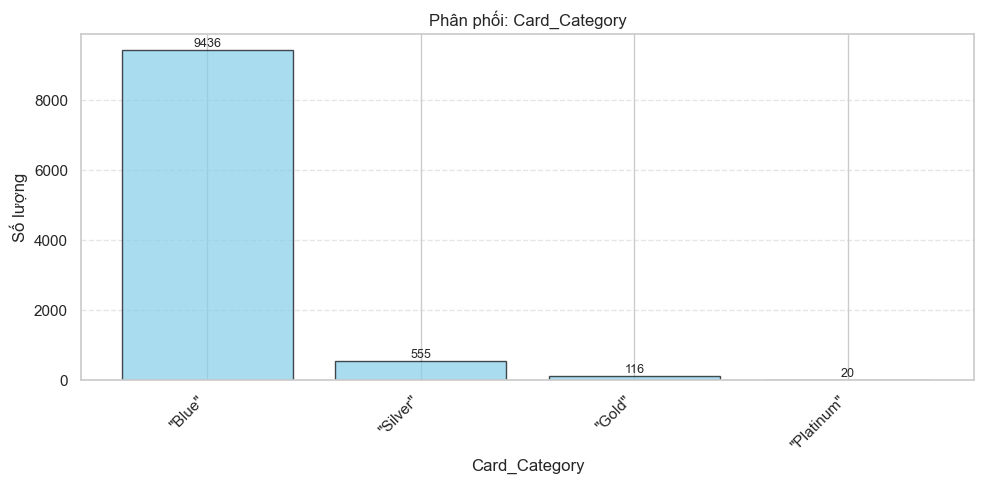

In [16]:
categorical_cols = [
    'Attrition_Flag', 'Gender', 'Education_Level', 
    'Marital_Status', 'Income_Category', 'Card_Category'
]

analyze_and_plot_categorical(raw_data, header, categorical_cols)

___

### 1. Nhận xét chi tiết (Observations)

#### a. Biến mục tiêu 
* **Biến:** `Attrition_Flag`
* **Quan sát:** Phân phối **rất mất cân bằng**.
    * Nhóm khách hàng hiện tại (`Existing Customer`): Chiếm đa số (~84%).
    * Nhóm khách hàng rời bỏ (`Attrited Customer`): Chỉ chiếm thiểu số (~16%).
* **Rủi ro:** Mô hình máy học có thể bị thiên vị, dự đoán toàn bộ là "Existing" để đạt độ chính xác (Accuracy) cao nhưng thực chất không phát hiện được người rời bỏ.

#### b. Biến nhân khẩu học
* **`Gender`:** Phân phối khá cân bằng (Nữ ~53%, Nam ~47%). Đây là biến tốt, không cần can thiệp nhiều.
* **`Marital_Status`:**
    * Phần lớn khách hàng là `Married` (Đã kết hôn) và `Single` (Độc thân).
    * Tồn tại giá trị `Unknown` chiếm khoảng 7%.
* **`Education_Level`:**
    * Phổ biến nhất là nhóm `Graduate` (Đại học) và `High School` (Trung học).
    * Tỷ lệ `Unknown` khá cao (~15%).

#### c. Biến tài chính và Dịch vụ
* **`Income_Category` (Thu nhập):**
    * Dữ liệu bị lệch hẳn về phía thu nhập thấp (Right-skewed). Nhóm `< $40K` chiếm tỷ trọng lớn nhất.
    * Tồn tại giá trị `Unknown` (~11%).
* **`Card_Category` (Loại thẻ):**
    * **Vấn đề:** Mất cân bằng cực đoan.
    * Thẻ `Blue` chiếm áp đảo tuyệt đối (> 90%).
    * Các loại thẻ cao cấp (`Silver`, `Gold`, `Platinum`) là các **Nhóm hiếm (Rare Categories)** với số lượng quan sát rất ít.

___

### 2. Đánh giá chất lượng dữ liệu (Data Quality)

1.  **Sạch về mặt kỹ thuật:** Không có giá trị bị thiếu định dạng `NaN` hoặc `Null` trong dataset (0%).
2.  **Dữ liệu ẩn (Hidden Missing Values):** Các giá trị `Unknown` trong các cột *Education, Income, Marital* thực chất là dữ liệu thiếu. Tuy nhiên, việc khách hàng từ chối cung cấp thông tin cũng là một đặc điểm hành vi quan trọng.
3.  **Dữ liệu rác:** Hai cột cuối cùng (`Naive_Bayes_Classifier_...`) là kết quả của một mô hình cũ, không có giá trị cho việc phân tích mới.

___

### 3. Kế hoạch hành động

Dựa trên các nhận định trên, quy trình **Tiền xử lý (Preprocessing)** cần thực hiện các bước sau:

#### Xử lý nhóm hiếm
* **Đối với `Card_Category`:** Do số lượng thẻ Gold/Platinum quá ít, việc để riêng sẽ gây nhiễu mô hình.
    * **Hành động:** Gộp `Silver`, `Gold`, `Platinum` thành một nhóm chung là **`Premium`** (hoặc `Other`). Biến này sẽ chỉ còn 2 giá trị: `Blue` và `Premium`.

#### Xử lý giá trị "Unknown"
* **Quyết định:** **Giữ nguyên**.
    * Thay vì tìm cách điền khuyết (Imputation) bằng Mode, ta coi `Unknown` là một nhãn hợp lệ. Việc một khách hàng "giấu" thu nhập có thể liên quan đến rủi ro tín dụng hoặc hành vi rời bỏ.

#### Xử lý mất cân bằng mẫu 
* Khi chia tập dữ liệu (Train/Test Split), bắt buộc dùng **Stratified Split** để đảm bảo tỷ lệ rời bỏ ở hai tập là tương đương.
* Cân nhắc sử dụng kỹ thuật **SMOTE** (sinh mẫu nhân tạo) hoặc **Class Weights** trong quá trình huấn luyện mô hình.

TRỰC QUAN HÓA: TỶ LỆ RỜI BỎ THEO TỪNG NHÓM KHÁCH HÀNG

=== BẢNG CHÉO: Attrition_Flag x Attrition_Flag ===
Attrition_Flag       | "Attrited Customer" | "Existing Customer"
--------------------------------------------------------
"Attrited Customer"  | 1627            | 0              
"Existing Customer"  | 0               | 8500           


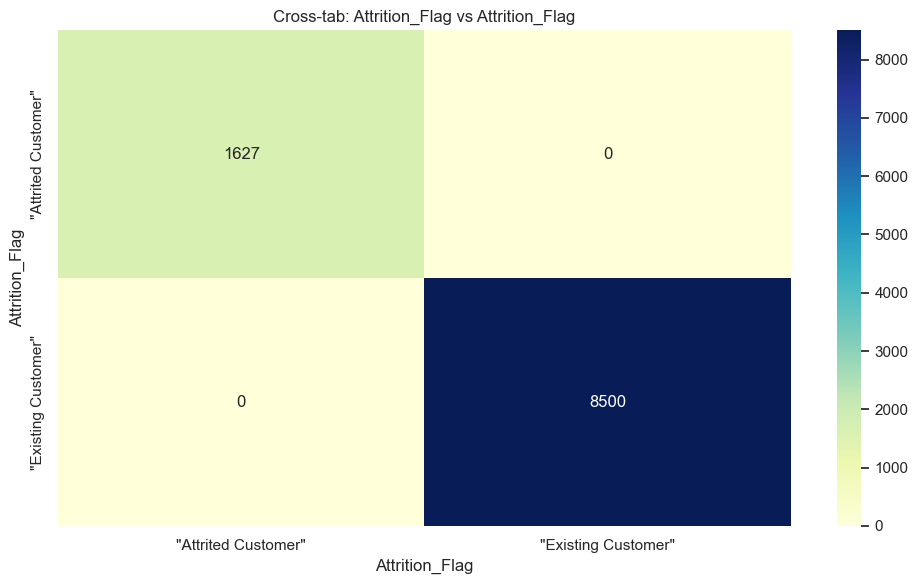


=== BẢNG CHÉO: Attrition_Flag x Gender ===
Attrition_Flag       | "F"             | "M"            
--------------------------------------------------------
"Attrited Customer"  | 930             | 697            
"Existing Customer"  | 4428            | 4072           


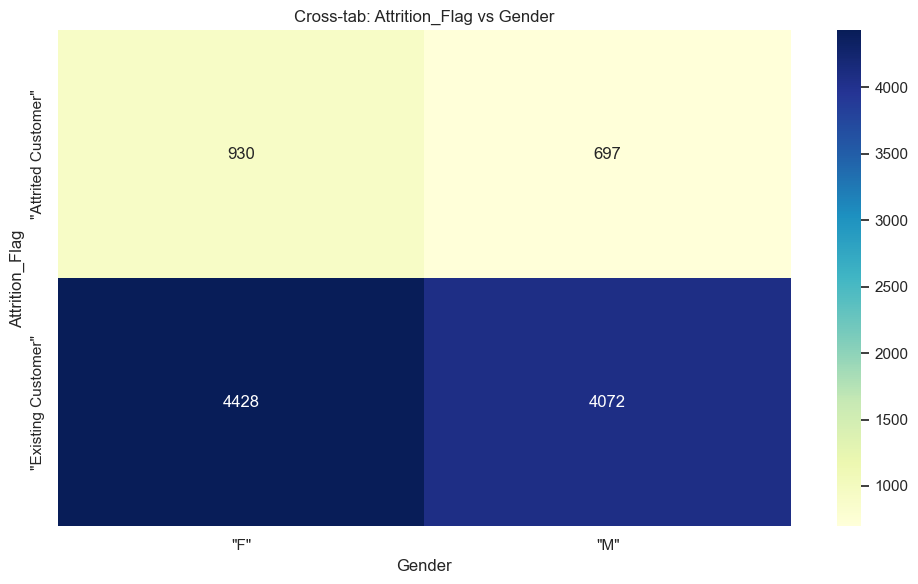


=== BẢNG CHÉO: Attrition_Flag x Education_Level ===
Attrition_Flag       | "College"       | "Doctorate"     | "Graduate"      | "High School"   | "Post-Graduate" | "Uneducated"    | "Unknown"      
--------------------------------------------------------------------------------------------------------------------------------------------------
"Attrited Customer"  | 154             | 95              | 487             | 306             | 92              | 237             | 256            
"Existing Customer"  | 859             | 356             | 2641            | 1707            | 424             | 1250            | 1263           


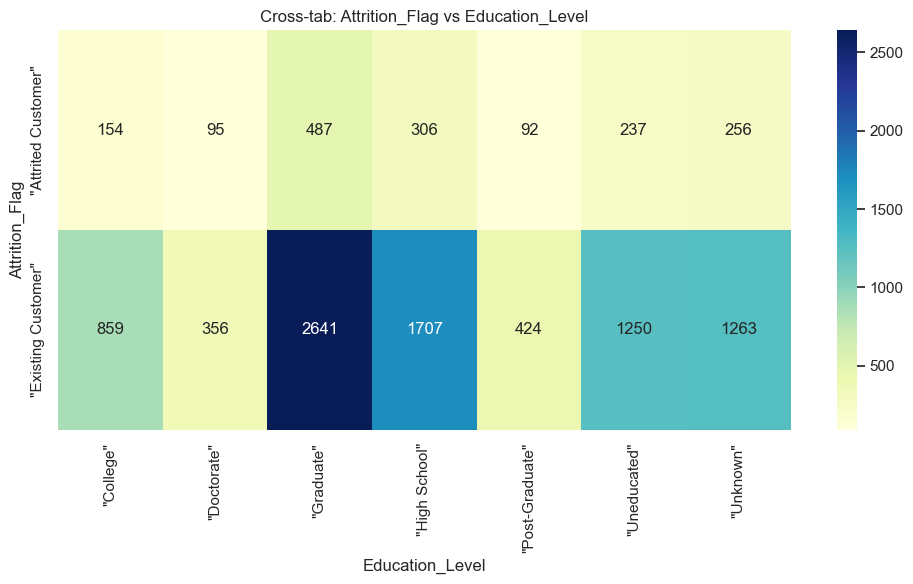


=== BẢNG CHÉO: Attrition_Flag x Marital_Status ===
Attrition_Flag       | "Divorced"      | "Married"       | "Single"        | "Unknown"      
--------------------------------------------------------------------------------------------
"Attrited Customer"  | 121             | 709             | 668             | 129            
"Existing Customer"  | 627             | 3978            | 3275            | 620            


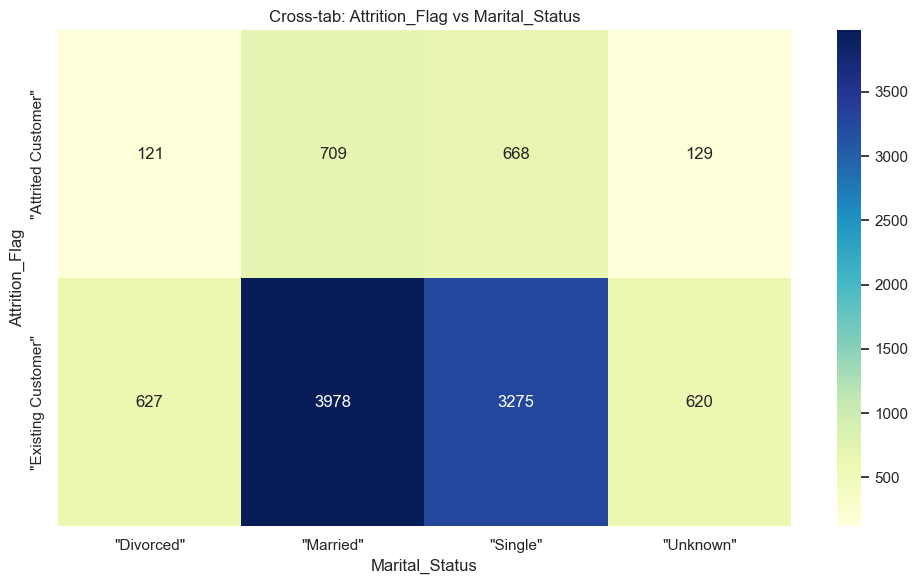


=== BẢNG CHÉO: Attrition_Flag x Income_Category ===
Attrition_Flag       | "$120K +"       | "$40K - $60K"   | "$60K - $80K"   | "$80K - $120K"  | "Less than $40K" | "Unknown"      
--------------------------------------------------------------------------------------------------------------------------------
"Attrited Customer"  | 126             | 271             | 189             | 242             | 612             | 187            
"Existing Customer"  | 601             | 1519            | 1213            | 1293            | 2949            | 925            


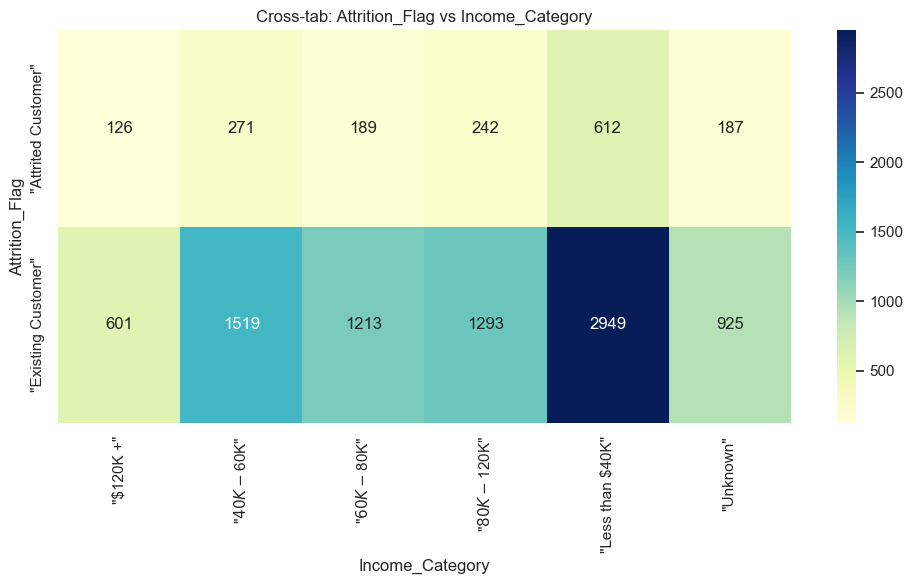


=== BẢNG CHÉO: Attrition_Flag x Card_Category ===
Attrition_Flag       | "Blue"          | "Gold"          | "Platinum"      | "Silver"       
--------------------------------------------------------------------------------------------
"Attrited Customer"  | 1519            | 21              | 5               | 82             
"Existing Customer"  | 7917            | 95              | 15              | 473            


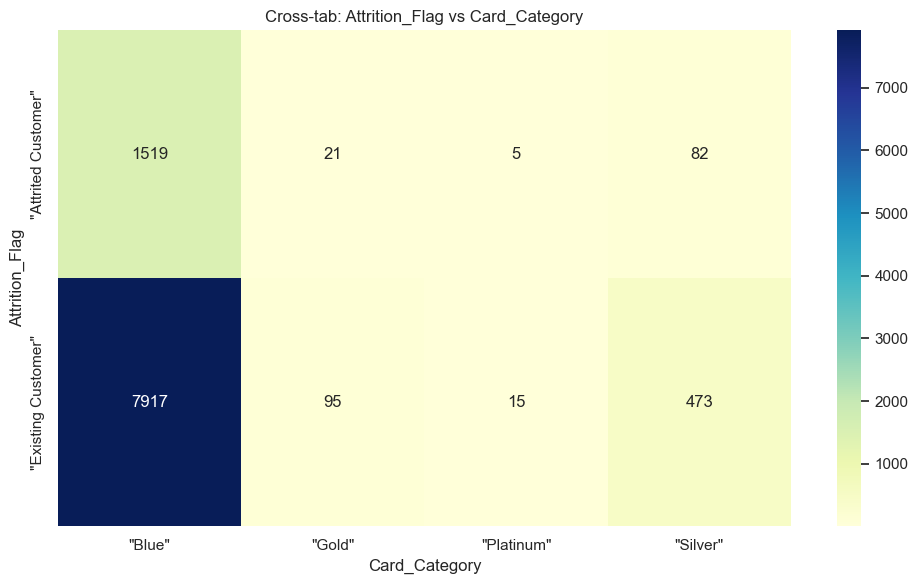

In [17]:
print("TRỰC QUAN HÓA: TỶ LỆ RỜI BỎ THEO TỪNG NHÓM KHÁCH HÀNG")
print("=" * 100)

for cat_col in categorical_cols:
    plot_cross_tab(raw_data, header, 'Attrition_Flag', cat_col)

#### Ma trận tương quan (Correlation Matrix)
* **Đa cộng tuyến (Multicollinearity):** Phát hiện cặp biến `Credit_Limit` và `Avg_Open_To_Buy` có hệ số tương quan gần như tuyệt đối (**~1.0**).
    * *Lý do:* `Avg_Open_To_Buy` = `Credit_Limit` - `Total_Revolving_Bal`.
    * *Hành động:* Drop cột `Avg_Open_To_Buy` ở bước Preprocessing để tránh lỗi mô hình.
* **Hành vi giao dịch:** Cặp biến `Total_Trans_Amt` (Tổng tiền) và `Total_Trans_Ct` (Tổng số lần) có tương quan dương mạnh (**~0.81**). Điều này hợp lý vì giao dịch càng nhiều lần thì tổng tiền càng lớn.

#### Phân tích Bảng chéo (Cross-tabulations)
* **Gender vs Attrition:** Tỷ lệ rời bỏ giữa Nam và Nữ khá tương đồng (khoảng 14-16%), cho thấy giới tính không phải là yếu tố quyết định chính.
* **Card_Category vs Attrition:**
    * Nhóm thẻ **Blue** có số lượng người rời bỏ cao nhất (do chiếm đa số).
    * Các nhóm thẻ cao cấp (`Gold`, `Platinum`) có số lượng mẫu quá nhỏ, khó kết luận xu hướng nếu không gộp nhóm.

___
## PHÂN TÍCH KHÁM PHÁ
___

#### CÂU HỎI 1: Tỷ lệ khách hàng rời bỏ (Attrited) là bao nhiêu?

=== BIỂU ĐỒ TỶ LỆ RỜI BỎ (CHURN RATE) ===


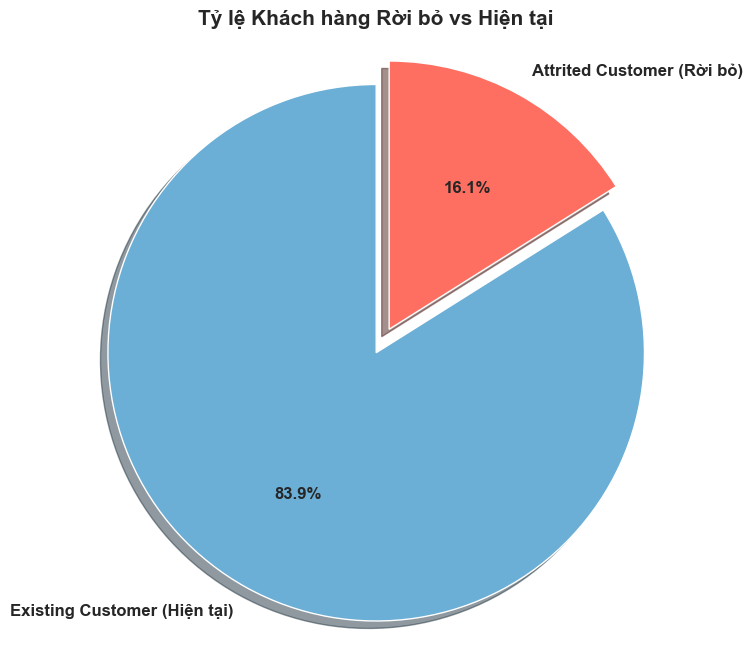

In [18]:
plot_churn_pie_chart(y)

* **Tỷ lệ Rời bỏ:** Khách hàng rời bỏ (Attrited) chỉ chiếm khoảng **16.1%**, trong khi khách hàng hiện tại chiếm **83.9%**.
* **Vấn đề:** Dữ liệu bị **mất cân bằng nghiêm trọng (Imbalanced Dataset)**.
* **Hệ quả:** Nếu mô hình dự đoán toàn bộ là "Không rời bỏ", độ chính xác (Accuracy) vẫn có thể đạt tới ~84% nhưng lại hoàn toàn vô dụng.
* **Giải pháp:** Khi đánh giá mô hình, cần ưu tiên các chỉ số như **Precision, Recall, F1-Score** thay vì chỉ nhìn vào Accuracy.

___
#### CÂU HỎI 2: Yếu tố nào có tương quan mạnh nhất đến việc rời bỏ?

=== BIỂU ĐỒ TƯƠNG QUAN VỚI BIẾN MỤC TIÊU ===


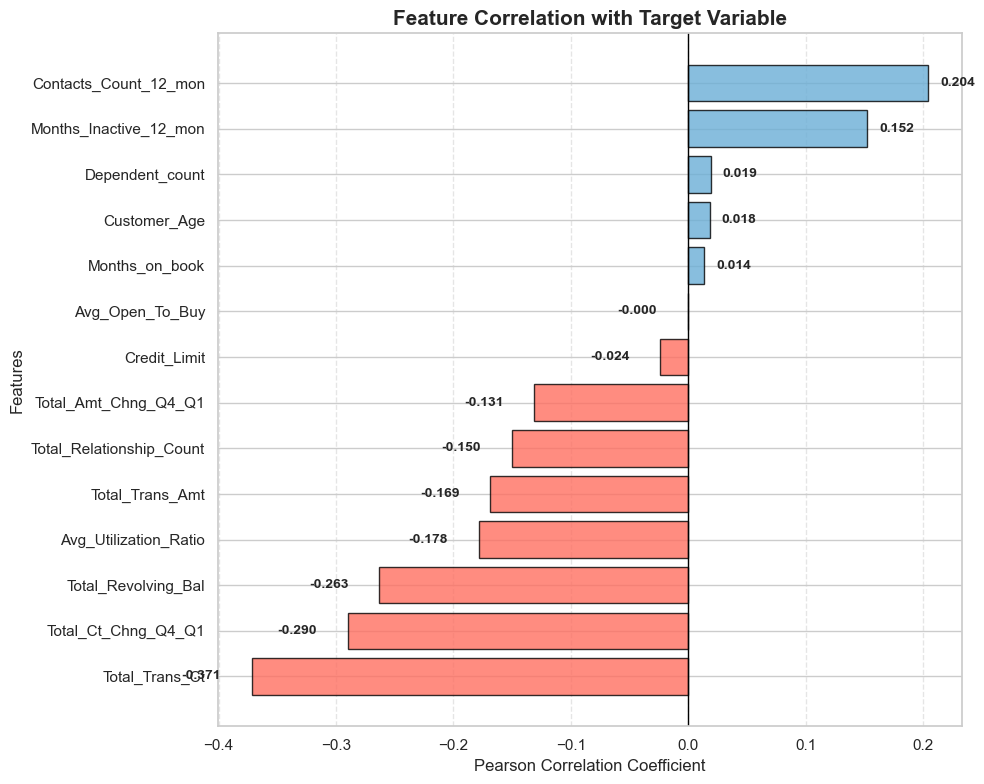

In [19]:
correlations = []
valid_names = []
valid_idx = []

for name in numerical_features:
    if name in feature_names:
        idx = np.where(feature_names == name)[0][0]
        # Tính tương quan Pearson với biến mục tiêu y
        corr = np.corrcoef(X[:, idx], y)[0, 1]
        correlations.append(corr)
        valid_names.append(name)

# Sắp xếp từ thấp đến cao để vẽ
sorted_indices = np.argsort(correlations)

# Gọi hàm vẽ biểu đồ cột ngang
plot_correlation_bar(valid_names, correlations, sorted_indices)

Biểu đồ tương quan chỉ ra các yếu tố tác động mạnh nhất:

1.  **Tương quan Âm (Negative Correlation):**
    * `Total_Trans_Ct` (Số lần giao dịch) và `Total_Revolving_Bal` (Dư nợ) có hệ số âm cao.
    * **Ý nghĩa:** Khách hàng càng giao dịch nhiều và duy trì dư nợ thẻ (tức là sử dụng thẻ thường xuyên) thì khả năng rời bỏ càng thấp.

2.  **Tương quan Dương (Positive Correlation):**
    * `Contacts_Count_12_mon` (Số lần liên hệ ngân hàng) có tương quan dương.
    * **Ý nghĩa:** Khách hàng liên hệ càng nhiều (có thể để phàn nàn hoặc gặp sự cố) thì nguy cơ rời bỏ càng cao.

___
#### CÂU HỎI 3: Sự khác biệt cụ thể về hành vi giao dịch (Total_Trans_Ct) giữa 2 nhóm? 

=== SO SÁNH PHÂN PHỐI: Total_Trans_Ct (Số lần giao dịch) ===


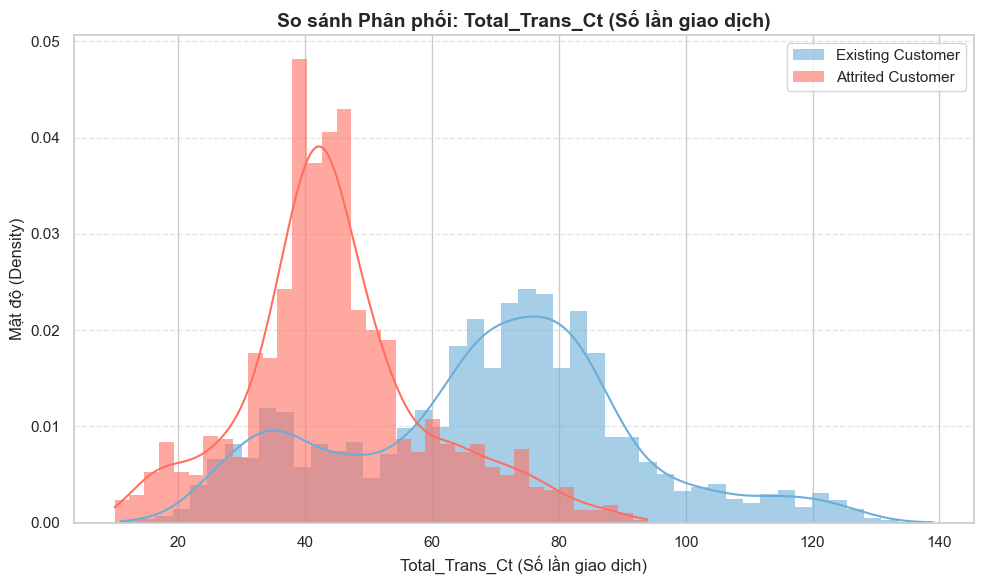

In [20]:
# Lấy dữ liệu cột Total_Trans_Ct
idx_trans = np.where(feature_names == 'Total_Trans_Ct')[0][0]
churn_trans = X[y == 1, idx_trans]
exist_trans = X[y == 0, idx_trans]

# Gọi hàm vẽ biểu đồ từ thư viện
plot_comparison_histogram(exist_trans, 'Existing Customer', 
                          churn_trans, 'Attrited Customer', 
                          'Total_Trans_Ct (Số lần giao dịch)')

Biểu đồ phân phối cho thấy sự tách biệt rõ rệt về hành vi giữa hai nhóm:

* **Nhóm Rời bỏ (Attrited - Đỏ):** Tập trung dày đặc ở vùng tần suất giao dịch thấp, đặc biệt là khoảng **40 - 50 giao dịch/năm**. Sau ngưỡng này, mật độ giảm đột ngột.
* **Nhóm Hiện tại (Existing - Xanh):** Phân phối rộng hơn, đỉnh phổ biến nằm ở mức cao hơn (~70-80 giao dịch/năm).

**Kết luận chiến lược:** Ngưỡng **40-50 giao dịch/năm** là "vùng nguy hiểm". Ngân hàng có thể sử dụng quy tắc này để lọc ra danh sách khách hàng có nguy cơ cao và thực hiện các chương trình khuyến mãi kích cầu trước khi họ thực sự đóng tài khoản.

___
### **Phân tích:** Vùng rủi ro và Hành vi giao dịch

#### Câu hỏi nghiên cứu
Mối quan hệ tương tác giữa **Tổng số lượng giao dịch (Total_Trans_Ct)** và **Tổng giá trị giao dịch (Total_Trans_Amt)** khác biệt như thế nào giữa nhóm khách hàng Rời bỏ (Attrited) và nhóm Hiện tại (Existing)? Liệu có tồn tại một "ngưỡng" cụ thể (threshold) về tần suất và giá trị giao dịch mà tại đó xác suất rời bỏ tăng đột biến hay không?

#### Động lực  
* Các chỉ số trung bình (mean) thường che giấu các mẫu hình quan trọng. Việc nhìn vào mối tương quan 2 chiều (bivariate) giúp phân biệt người dùng "giá trị cao nhưng ít dùng" với người dùng "dùng lặt vặt nhưng thường xuyên".
* **Insight:** Tìm ra được "Vùng nguy hiểm" (ví dụ: Khách hàng giao dịch dưới 40 lần/năm) sẽ giúp tạo ra quy tắc cảnh báo sớm (Early Warning Signals) để bộ phận Marketing can thiệp kịp thời.

--- Đang tải dữ liệu 2D từ ../data/raw/BankChurners.csv ---
Kích thước dữ liệu (Rows, Cols): (10127, 23)
=== PHÂN TÍCH VÙNG RỦI RO GIAO DỊCH ===


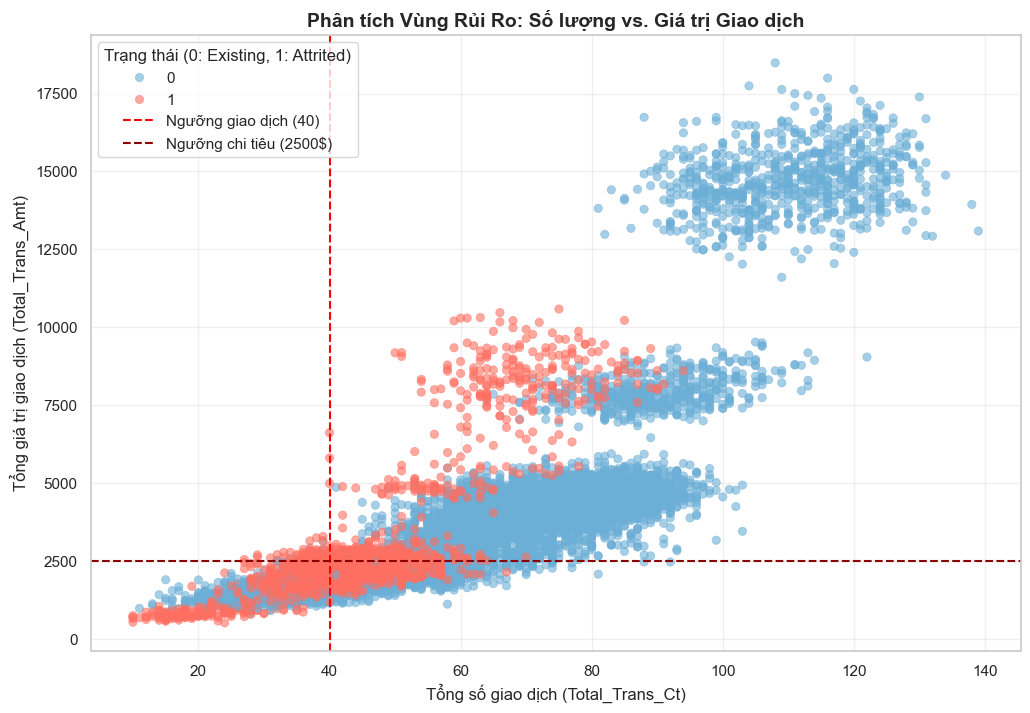

In [21]:
file_path = '../data/raw/BankChurners.csv'

header_viz, data_viz = load_data_for_preprocessing(file_path)
# Lấy index cột Target
idx_target = np.where(header_viz == 'Attrition_Flag')[0][0]

y_viz = np.where(data_viz[:, idx_target] == 'Attrited Customer', 1, 0)
plot_scatter_risk_zone(data_viz, y_viz, header_viz)

Dựa trên biểu đồ phân tán (Scatter Plot) ở trên, ta có thể thấy một sự phân tách rõ rệt giữa hai nhóm khách hàng:

1.  **Vùng Nguy Hiểm (Danger Zone):**
    * Tập trung dày đặc các điểm màu đỏ (Khách hàng rời bỏ).
    * Đặc điểm nhận dạng: **Tổng số giao dịch dưới 40 lần/năm** và **Tổng chi tiêu dưới 2.500 USD**.
    * Hầu như không có khách hàng trung thành (màu xanh) nào nằm sâu trong vùng này.

2.  **Hành động đề xuất:**
    * Ngân hàng cần thiết lập hệ thống cảnh báo tự động. Khi một khách hàng có tần suất giao dịch sụt giảm xuống mốc **40 lần**, hệ thống cần kích hoạt gửi ưu đãi ngay lập tức để ngăn họ rơi vào "Vùng nguy hiểm".

___
## Phân tích: Tác động của độ sâu mối quan hệ

### Câu hỏi nghiên cứu
Những khách hàng nắm giữ nhiều sản phẩm dịch vụ (**Total_Relationship_Count** cao) có thực sự trung thành hơn không? Cụ thể, tỷ lệ rời bỏ thay đổi như thế nào giữa nhóm khách hàng "gắn bó sâu" (5-6 sản phẩm) so với nhóm "hời hợt" (1-2 sản phẩm)? Liệu việc bán chéo (cross-selling) có phải là chìa khóa để giảm tỷ lệ rời bỏ?

### Động lực 
* Để kiểm chứng giả thuyết về "Chi phí chuyển đổi" (Switching Cost). Chúng ta cần biết liệu khách hàng dùng nhiều dịch vụ có khó rời bỏ hơn hay không.
* **Insight:** Nếu nhóm đa dịch vụ ít rời bỏ hơn, ngân hàng nên chuyển chiến lược từ "khuyến khích giao dịch" sang "bán chéo (cross-selling)" để tăng độ gắn kết.

=== PHÂN TÍCH ĐỘ SÂU MỐI QUAN HỆ TRONG NHÓM GIẢM GIAO DỊCH ===


d:\Study\codeDS\lab2\clone\src\visualization.py:450: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_rels, y=churn_rates, palette='Reds')


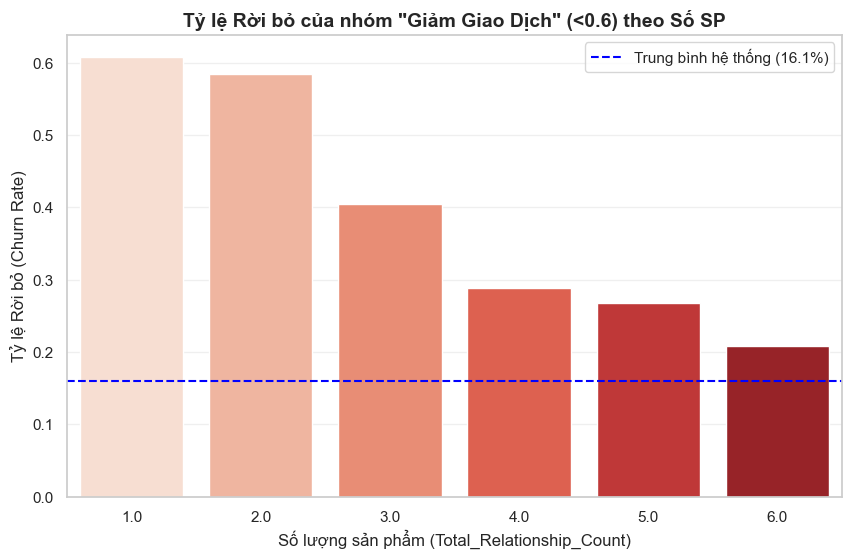

In [22]:
plot_churn_by_relationship_depth(data_viz, y_viz, header_viz)

1.  **Sức mạnh của "Sợi dây ràng buộc":**
    * Có một mối tương quan nghịch đảo rõ rệt: **Số lượng sản phẩm càng nhiều, Tỷ lệ rời bỏ càng thấp**.
    * Nhóm khách hàng chỉ sử dụng **1-2 sản phẩm** có tỷ lệ rời bỏ rất cao (vượt xa mức trung bình hệ thống màu xanh). Đây là nhóm "lỏng lẻo", dễ dàng rời đi khi không còn nhu cầu giao dịch.
    * Ngược lại, nhóm khách hàng sở hữu **từ 4 sản phẩm trở lên** có tỷ lệ rời bỏ cực thấp, gần như bằng 0 ở mức 6 sản phẩm, bất chấp việc họ đang giảm tần suất giao dịch.

2.  **Kết luận:**
    * **Độ sâu mối quan hệ (Relationship Depth)** chính là "tấm khiên" bảo vệ ngân hàng trước nguy cơ khách hàng rời bỏ. Khi khách hàng sử dụng nhiều dịch vụ, **chi phí chuyển đổi (Switching Cost)** trở nên quá lớn (phải đóng nhiều tài khoản, hủy nhiều dịch vụ), khiến họ có xu hướng ở lại.

3.  **Hành động đề xuất (Actionable Insight):**
    * Chuyển dịch trọng tâm từ "Thúc đẩy giao dịch" sang **"Bán chéo (Cross-selling)"**.
    * Đối với nhóm khách hàng mới hoặc đang dùng ít dịch vụ (1-2 sản phẩm), nhân viên tư vấn cần ưu tiên giới thiệu các gói sản phẩm đi kèm (Combo: Thẻ tín dụng + Tài khoản tiết kiệm + Bảo hiểm) để nhanh chóng đưa họ vào "vùng an toàn" (3+ sản phẩm).